In [ ]:
# example (CPU-safe)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# install PyTorch Geometric (PyG)
!pip install torch_geometric

!pip install pandas numpy scikit-learn matplotlib plotly networkx jupyterlab
!pip install torch_geometric torch_geometric_temporal   # temporal helpers
!pip install kaggle google-cloud-bigquery pyarrow fastparquet   # data I/O
!pip install streamlit pyngrok pyvis  # demo/visualization

# Colab cell 1: install kaggle and tools
!pip install --upgrade --quiet kaggle pandas numpy matplotlib networkx scikit-learn
# (you'll install PyTorch / PyG later — see A.3)

!pip install --quiet torch torchvision torchaudio
!pip install --quiet torch_geometric torch_sparse torch_scatter torch_cluster torch_spline_conv

!pip install -q kaggle
!kaggle datasets download -d ellipticco/elliptic-data-set -p data/elliptic
!unzip -o data/elliptic/elliptic-data-set.zip -d data/elliptic
!ls -lh data/elliptic

!pip install torch_geometric

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 447.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully un

In [ ]:
from google.colab import files
files.upload()  # choose kaggle.json from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


# ==== One-shot setup cell for Colab (PyTorch Geometric + Elliptic Dataset) ====

# 1. Install PyTorch (CPU build; use CUDA if you plan GPU training)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# 2. Install PyTorch Geometric (auto-handles extensions: torch_scatter, torch_sparse, etc.)
!pip install torch-geometric

# 3. Install common ML / Data packages
!pip install pandas numpy scikit-learn matplotlib networkx plotly kaggle pyarrow fastparquet

# 4. Install visualization/demo tools
!pip install streamlit pyngrok pyvis

# 5. Download Elliptic Dataset from Kaggle (50 MB)
!kaggle datasets download -d ellipticco/elliptic-data-set -p data/elliptic
!unzip -o data/elliptic/elliptic-data-set.zip -d data/elliptic
!ls -lh data/elliptic


In [ ]:
!mkdir -p data/elliptic
!kaggle datasets download -d ellipticco/elliptic-data-set -p data/elliptic
!unzip -q data/elliptic/elliptic-data-set.zip -d data/elliptic
# listing files:
!ls -lh data/elliptic


Dataset URL: https://www.kaggle.com/datasets/ellipticco/elliptic-data-set
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 77% 112M/146M [00:00<00:00, 567MB/s] 
100% 146M/146M [00:00<00:00, 486MB/s]
total 147M
drwxr-xr-x 2 root root 4.0K Aug 31 14:35 elliptic_bitcoin_dataset
-rw-r--r-- 1 root root 147M Jul 31  2019 elliptic-data-set.zip


features shape: (203769, 167)
edges shape: (234355, 2)
classes shape: (203769, 2)
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


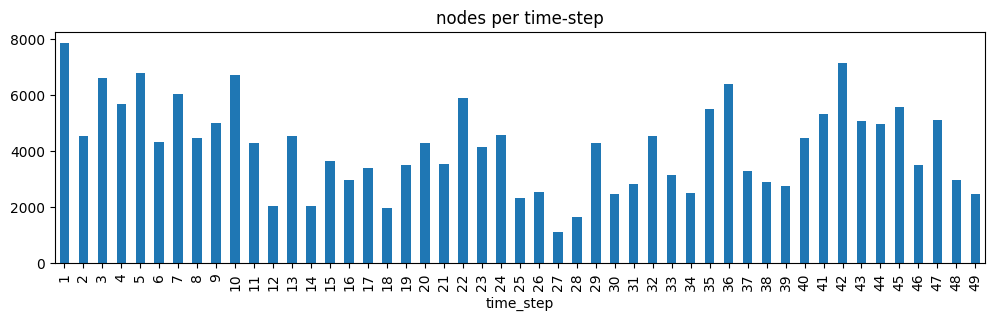

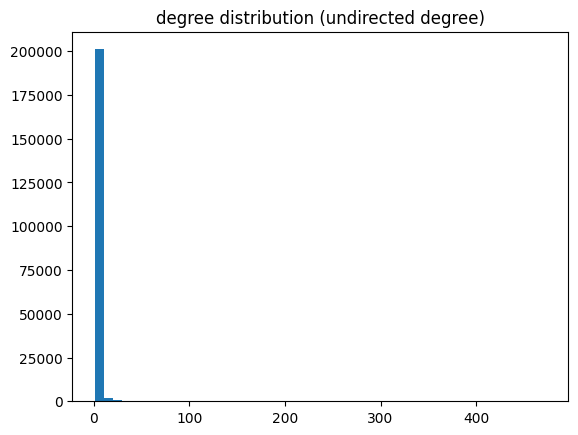

basic stats: nodes, edges: 203769 234355


In [ ]:
#EDA
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

BASE = "data/elliptic/elliptic_bitcoin_dataset"

# 1) load files
feat_df = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
# the CSV: col0=txId, col1=time_step, cols2.. = features
feat_df = feat_df.rename(columns={0: "txId", 1: "time_step"})
edge_df = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")  # two cols: source,dst
class_df = pd.read_csv(f"{BASE}/elliptic_txs_classes.csv")  # likely columns: txId, class

print("features shape:", feat_df.shape)
print("edges shape:", edge_df.shape)
print("classes shape:", class_df.shape)

# 2) label distribution
print(class_df['class'].value_counts(dropna=False))

# 3) nodes per timestep
counts_by_time = feat_df['time_step'].value_counts().sort_index()
counts_by_time.plot(kind='bar', figsize=(12,3), title='nodes per time-step')
plt.show()

# 4) degree distribution (use networkx, but only on edges)
G = nx.from_pandas_edgelist(edge_df, source=edge_df.columns[0], target=edge_df.columns[1], create_using=nx.DiGraph)
deg = np.array([d for _, d in G.degree()])
plt.hist(deg, bins=50)
plt.title("degree distribution (undirected degree)")
plt.show()

print("basic stats: nodes, edges:", G.number_of_nodes(), G.number_of_edges())


In [ ]:
%%bash
cat > train_elliptic_sage.py <<'PY'
#!/usr/bin/env python3
"""
train_elliptic_sage.py
Simple GraphSAGE baseline for Elliptic dataset (PyTorch Geometric).
- Loads PyG EllipticBitcoinDataset
- Trains a small SAGE model on timestamp-based train_mask
- Reports AUPRC, ROC-AUC, Precision@K
- Produces a 1-hop subgraph plot of top illicit prediction
"""
import os
import torch
import torch.nn.functional as F
from torch_geometric.datasets import EllipticBitcoinDataset
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import k_hop_subgraph, to_networkx
from sklearn.metrics import average_precision_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# Hyperparams
HIDDEN = 128
NUM_LAYERS = 3
EPOCHS = 50
LR = 0.01
WEIGHT_DECAY = 5e-4
DROPOUT = 0.5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", DEVICE)

def make_model(in_channels, hidden, out_channels, num_layers=3):
    class SAGE(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.convs = torch.nn.ModuleList()
            self.convs.append(SAGEConv(in_channels, hidden))
            for _ in range(num_layers - 2):
                self.convs.append(SAGEConv(hidden, hidden))
            self.convs.append(SAGEConv(hidden, out_channels))
            self.dropout = DROPOUT

        def forward(self, x, edge_index):
            for conv in self.convs[:-1]:
                x = conv(x, edge_index)
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
            x = self.convs[-1](x, edge_index)
            return x
    return SAGE()

def precision_at_k(y_true, scores, K):
    # y_true: 0/1 array; scores: float array (higher -> more likely 1)
    order = np.argsort(-scores)
    topk = order[:K]
    return float(y_true[topk].sum() / K)

def main(root='data/elliptic/pyg'):
    print("Loading dataset (PyG will download if needed) ...")
    dataset = EllipticBitcoinDataset(root)
    data = dataset[0]
    print("Data stats: x.shape", data.x.shape, "edge_index.shape", data.edge_index.shape)

    # Create a validation split from the train_mask
    train_nodes = data.train_mask.nonzero(as_tuple=False).view(-1)
    n_val = max(1, int(0.1 * train_nodes.size(0)))
    perm = torch.randperm(train_nodes.size(0))
    val_nodes = train_nodes[perm[:n_val]]
    train_nodes_new = train_nodes[perm[n_val:]]
    train_mask = torch.zeros_like(data.train_mask)
    val_mask = torch.zeros_like(data.train_mask)
    train_mask[train_nodes_new] = True
    val_mask[val_nodes] = True

    # send to device
    data = data.to(DEVICE)
    train_mask = train_mask.to(DEVICE)
    val_mask = val_mask.to(DEVICE)

    model = make_model(data.num_features, HIDDEN, dataset.num_classes, NUM_LAYERS).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    loss_fn = torch.nn.CrossEntropyLoss()

    best_val_ap = 0.0
    best_state = None

    for epoch in range(1, EPOCHS + 1):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)                # logits shape [N, num_classes]
        loss = loss_fn(out[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            logits = model(data.x, data.edge_index)
            probs = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()  # prob of class=1 (illicit)
            # val indices and labels
            val_idx = val_mask.nonzero(as_tuple=False).view(-1).cpu().numpy()
            if len(val_idx) > 0:
                y_val = data.y[val_mask].cpu().numpy()
                y_scores_val = probs[val_idx]
                val_ap = average_precision_score(y_val, y_scores_val)
            else:
                val_ap = 0.0

        if val_ap > best_val_ap:
            best_val_ap = val_ap
            best_state = model.state_dict()

        if epoch % 5 == 0 or epoch == 1:
            print(f"Epoch {epoch:3d} loss: {loss.item():.4f}  val_AP: {val_ap:.4f}  best_val_AP: {best_val_ap:.4f}")

    # Load best
    if best_state is not None:
        model.load_state_dict(best_state)

    # TEST metrics
    model.eval()
    with torch.no_grad():
        logits = model(data.x, data.edge_index)
        probs = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()
        test_idx = data.test_mask.nonzero(as_tuple=False).view(-1).cpu().numpy()
        y_test = data.y[data.test_mask].cpu().numpy()
        scores_test = probs[test_idx]

        # AUPRC
        ap = average_precision_score(y_test, scores_test)
        # ROC AUC (needs at least two classes present)
        try:
            roc = roc_auc_score(y_test, scores_test)
        except ValueError:
            roc = float('nan')

        p_at_10 = precision_at_k(y_test, scores_test, K=10) if len(scores_test) >= 10 else None
        p_at_50 = precision_at_k(y_test, scores_test, K=50) if len(scores_test) >= 50 else None

        print("TEST: AUPRC (avg precision):", ap)
        print("TEST: ROC-AUC:", roc)
        print("TEST: Precision@10:", p_at_10, " Precision@50:", p_at_50)

    # Visualize 1-hop subgraph around top predicted illicit (from test set)
    # pick top predicted test node
    order = np.argsort(-scores_test)
    if len(order) == 0:
        print("No test nodes to visualize.")
        return

    top_test_node = int(test_idx[order[0]])
    # k-hop subgraph (k=1)
    subset, edge_index_sub, mapping, edge_mask = k_hop_subgraph(top_test_node, 1, data.edge_index, relabel_nodes=True)
    # convert to networkx and plot
    sub_x = data.x[subset].cpu().numpy()
    sub_y = data.y[subset].cpu().numpy()
    # reconstruct Data for to_networkx
    from torch_geometric.data import Data
    sub_data = Data(x=data.x[subset].cpu(), edge_index=edge_index_sub)
    G = to_networkx(sub_data, to_undirected=True)
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G, seed=42)
    # color nodes by ground-truth (unknown will be 2; convert to colors)
    colors = []
    for i, n in enumerate(G.nodes()):
        label = int(sub_y[i]) if i < len(sub_y) else 2
        if label == 1:
            colors.append('red')   # illicit
        elif label == 0:
            colors.append('green') # licit
        else:
            colors.append('grey')  # unknown
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=200)
    plt.title(f"1-hop subgraph around node {top_test_node} (top predicted illicit)")
    plt.show()

if __name__ == "__main__":
    main()
PY


In [ ]:
# Run the script (in Colab you can just run it here)
!python train_elliptic_sage.py


Device: cpu
Loading dataset (PyG will download if needed) ...
Processing...
Done!
Data stats: x.shape torch.Size([203769, 165]) edge_index.shape torch.Size([2, 234355])
Epoch   1 loss: 0.8481  val_AP: 0.2575  best_val_AP: 0.2575
Epoch   5 loss: 0.3152  val_AP: 0.5533  best_val_AP: 0.5533
Epoch  10 loss: 0.2116  val_AP: 0.7395  best_val_AP: 0.7395
Epoch  15 loss: 0.1872  val_AP: 0.8207  best_val_AP: 0.8207
Epoch  20 loss: 0.1701  val_AP: 0.8680  best_val_AP: 0.8680
Epoch  25 loss: 0.1566  val_AP: 0.8887  best_val_AP: 0.8887
Epoch  30 loss: 0.1451  val_AP: 0.8875  best_val_AP: 0.8887
Epoch  35 loss: 0.1335  val_AP: 0.9029  best_val_AP: 0.9029
Epoch  40 loss: 0.1224  val_AP: 0.9208  best_val_AP: 0.9208
Epoch  45 loss: 0.1093  val_AP: 0.9415  best_val_AP: 0.9415
Epoch  50 loss: 0.0957  val_AP: 0.9509  best_val_AP: 0.9509
TEST: AUPRC (avg precision): 0.6387877336891976
TEST: ROC-AUC: 0.8983259068140514
TEST: Precision@10: 1.0  Precision@50: 0.96
Figure(600x600)


From here its step 2
B — Ethereum (wallet → wallet graphs) — detailed step-by-step

Goal: build wallet graph (nodes = addresses, edges = transfers, timestamps) and small, reviewable sample graphs for GNN training & TGN events.

B.1 Why BigQuery

Public Ethereum tables are huge — use Google BigQuery public datasets to query and export only the slice you need (date range / top wallets). This is standard practice.
Google Cloud
Google Cloud

B.2 Setup BigQuery (GCP)

Create a Google Cloud Project and enable billing (queries cost money by bytes scanned).

In the console enable the BigQuery API and the Blockchain Analytics: Ethereum Mainnet dataset (public).
Google Cloud

Create a service account and download the JSON key if you want to query from Python. Set GOOGLE_APPLICATION_CREDENTIALS to that key path.

Install python client:

pip install google-cloud-bigquery

B.3 Example SQL (grab ETH transfers 1-year slice)

Run this in BigQuery console or from Python:

SELECT
  LOWER(from_address) AS src,
  LOWER(to_address)   AS dst,
  block_timestamp AS ts,
  SAFE_DIVIDE(value, 1e18) AS eth_value
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE block_timestamp BETWEEN TIMESTAMP('2024-01-01') AND TIMESTAMP('2024-12-31')
AND from_address IS NOT NULL
AND to_address IS NOT NULL
LIMIT 1000000;  -- <- sample size, adjust


(Export as CSV/parquet to Cloud Storage if you need local processing.)
Google Cloud

B.4 Build a manageable graph (important)

Ethereum full graph is huge. For development & reviewer-friendly demos, sample:

Top N wallets by tx count (e.g., N=50k) or

Subgraph around known labels (exchanges, flagged addresses) with radius-2 neighborhood.
This lets you run GNNs and TGN locally.

B.5 Convert to PyG / TemporalData

Static graph (PyG Data):

# after exporting edges.csv
import pandas as pd
edges = pd.read_csv('eth_edges.csv', parse_dates=['ts'])
# build address->id mapping (only for sampled addresses)
addresses = pd.unique(edges[['src','dst']].values.ravel())
addr2id = {a:i for i,a in enumerate(addresses)}
edges['src_id'] = edges['src'].map(addr2id); edges['dst_id'] = edges['dst'].map(addr2id)
# compute simple node features
# save torch_geometric.data.Data with x, edge_index


Temporal event stream (for TGN/TGAT):
Save src_id,dst_id,ts,edge_features sorted by ts. Use PyG TemporalData or the TGN example (PyG docs have TGN example).
pytorch-geometric.readthedocs.io

B.6 Training & experiments

Train GraphSAGE on the sampled static graph (labels from a smaller labeled set or weak labels).

For temporal modeling, train TGN/TGAT on the event stream to predict next-node risk or next-edge risk.

In [ ]:
# Install BigQuery client
!pip install --quiet google-cloud-bigquery pandas pyarrow

# Authenticate (upload your GCP service account key JSON)
from google.colab import files
files.upload()  # <- upload service-account.json

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "traffic-detection-453110-1668ff6074c9.json"
from google.cloud import bigquery
client = bigquery.Client()


In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow
query = """
SELECT
  LOWER(from_address) AS src,
  LOWER(to_address) AS dst,
  block_timestamp AS ts,
  SAFE_DIVIDE(value, 1e18) AS eth_value
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE block_timestamp BETWEEN TIMESTAMP('2024-01-01') AND TIMESTAMP('2024-12-31')
AND from_address IS NOT NULL
AND to_address IS NOT NULL
LIMIT 2000000;  -- adjust sample size
"""

df = client.query(query).to_dataframe()
print(df.head())
print("Shape:", df.shape)


B.4 Build Manageable Graph

Ethereum is huge → sample for dev:

Option 1: Top N active wallets

Option 2: Neighborhood around known labeled addresses

Option 3: Just random slice (for experiments)

In [ ]:
import pandas as pd

# Assume df is already loaded from BigQuery (columns: src, dst, ts, eth_value)
print("Original df shape:", df.shape)

# Choose sampling strategy: "top_n", "neighborhood", or "random"
sampling_strategy = "top_n"  # change to "neighborhood" or "random"

if sampling_strategy == "top_n":
    # -----------------------------
    # Option 1: Top N active wallets by degree
    # -----------------------------
    N = 50000
    all_addrs = pd.concat([df['src'], df['dst']])
    top_addrs = all_addrs.value_counts().head(N).index
    sampled = df[(df['src'].isin(top_addrs)) & (df['dst'].isin(top_addrs))].copy()
    print(f"[Top N] Sampled edges (top {N} wallets):", sampled.shape)

elif sampling_strategy == "neighborhood":
    # -----------------------------
    # Option 2: Neighborhood around known labeled addresses
    # -----------------------------
    # Example labeled wallets (replace with actual list of known exchange or flagged addresses)
    labeled_wallets = ['0xabc123...', '0xdef456...']  # placeholder
    radius = 2  # neighborhood radius (2-hop)

    # Build adjacency dict
    adj = {}
    for _, row in df.iterrows():
        adj.setdefault(row['src'], set()).add(row['dst'])
        adj.setdefault(row['dst'], set()).add(row['src'])

    # BFS to collect radius-neighborhood
    selected_wallets = set(labeled_wallets)
    frontier = set(labeled_wallets)
    for _ in range(radius):
        next_frontier = set()
        for w in frontier:
            next_frontier |= adj.get(w, set())
        next_frontier -= selected_wallets
        selected_wallets |= next_frontier
        frontier = next_frontier

    sampled = df[df['src'].isin(selected_wallets) & df['dst'].isin(selected_wallets)].copy()
    print(f"[Neighborhood] Sampled edges (radius={radius} around {len(labeled_wallets)} labeled wallets):", sampled.shape)

elif sampling_strategy == "random":
    # -----------------------------
    # Option 3: Random slice for experiments
    # -----------------------------
    sample_size = 500000  # number of edges
    sampled = df.sample(n=min(sample_size, len(df)), random_state=42).copy()
    print(f"[Random] Sampled random {sample_size} edges:", sampled.shape)

else:
    raise ValueError("Unknown sampling_strategy. Choose 'top_n', 'neighborhood', or 'random'.")


In [ ]:
import torch
import torch_geometric
from torch_geometric.data import Data

print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("PyG:", torch_geometric.__version__)

# quick sanity check: make a tiny graph
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)
print(data)


In [ ]:
# Check python/torch/cuda info
import sys, torch
print("python:", sys.version.splitlines()[0])
print("torch:", getattr(torch, "__version__", "NOT INSTALLED"))
print("cuda available:", torch.cuda.is_available())
print("torch.version.cuda:", getattr(torch, "version", None) and torch.version.cuda)


In [ ]:
# Robust PyG install: auto-detects torch version and CUDA and installs matching PyG wheels.
import sys, subprocess, importlib
try:
    import torch
except Exception:
    torch = None

print("Python:", sys.executable)
if torch is None:
    print("Torch not found. Will install torch (CPU) first.")
else:
    print("Found torch:", torch.__version__, "cuda:", torch.cuda.is_available(), "torch.version.cuda:", getattr(torch, "version", None) and torch.version.cuda)

# Upgrade pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])

# If torch missing, install a lightweight CPU torch (safe fallback)
if torch is None:
    print("Installing CPU torch (safe default)...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--index-url", "https://download.pytorch.org/whl/cpu",
                           "torch", "torchvision", "torchaudio"])
    import torch

# Build wheel URL for PyG
TORCH = torch.__version__.split('+')[0]
CUDA_TAG = "cpu" if not torch.cuda.is_available() or torch.version.cuda is None else ("cu" + torch.version.cuda.replace('.', ''))
PYG_WHL = f"https://data.pyg.org/whl/torch-{TORCH}+{CUDA_TAG}.html"
print("Using TORCH tag:", TORCH, "CUDA tag:", CUDA_TAG)
print("PyG wheel index:", PYG_WHL)

# Try installing the binary wheels for the heavy deps, then torch_geometric
try:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--find-links", PYG_WHL,
                           "torch_scatter", "torch_sparse", "torch_cluster", "torch_spline_conv"], stderr=subprocess.STDOUT)
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torch_geometric"], stderr=subprocess.STDOUT)
    print("PyG and dependencies installed successfully.")
except subprocess.CalledProcessError as e:
    print("Primary wheel-based install failed. Trying fallback: single-step install of torch_geometric (may attempt builds).")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "torch_geometric"], stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e2:
        print("Fallback install also failed. See the pip output above for errors.")
        raise


In [ ]:
!pip install -U pip


In [ ]:
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.8.0+cu126.html


In [ ]:
import torch
import torch_geometric
import torch_scatter, torch_sparse, torch_cluster, torch_spline_conv

print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("PyG:", torch_geometric.__version__)


B.5 Convert to PyTorch Geometric Format

In [ ]:
!pip install --quiet networkx torch torch_geometric

import pandas as pd
import networkx as nx
import torch
from torch_geometric.data import Data


In [ ]:
print(df.head())
# Columns: src, dst, ts, eth_value


In [ ]:
# Re-run the cell to load the data into df after runtime restart
!pip install --quiet google-cloud-bigquery pandas pyarrow
from google.colab import files
# You may need to re-upload your service account key if prompted
# files.upload()

import os
# Make sure the path to your service account key is correct
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "traffic-detection-453110-1668ff6074c9.json"
from google.cloud import bigquery
client = bigquery.Client()

query = """
SELECT
  LOWER(from_address) AS src,
  LOWER(to_address) AS dst,
  block_timestamp AS ts,
  SAFE_DIVIDE(value, 1e18) AS eth_value
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE block_timestamp BETWEEN TIMESTAMP('2024-01-01') AND TIMESTAMP('2024-12-31')
AND from_address IS NOT NULL
AND to_address IS NOT NULL
LIMIT 2000000;  -- adjust sample size
"""

df = client.query(query).to_dataframe()
print(df.head())
print("Shape:", df.shape)

In [ ]:
import pandas as pd, networkx as nx, matplotlib.pyplot as plt, torch
import torch.nn.functional as F
from torch_geometric.datasets import EllipticBitcoinDataset
from torch_geometric.nn import SAGEConv
from torch_geometric.utils import k_hop_subgraph, to_networkx
import numpy as np
import os


# Define the SageNet model class locally, based on train_elliptic_sage.py
class SageNet(torch.nn.Module):
    def __init__(self, in_channels, hidden, out_channels, num_layers=3, dropout=0.5):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden, hidden))
        self.convs.append(SAGEConv(hidden, out_channels))
        self.dropout = dropout

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

# Load data using EllipticBitcoinDataset directly
print("Loading dataset (PyG will download if needed) ...")
dataset = EllipticBitcoinDataset("data/elliptic/pyg")
data = dataset[0]
print("Data stats: x.shape", data.x.shape, "edge_index.shape", data.edge_index.shape)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SageNet(data.x.shape[1], 64, dataset.num_classes).to(device) # Use dataset.num_classes
# Check if the model file exists before loading
if os.path.exists("elliptic_sage.pt"):
    model.load_state_dict(torch.load("elliptic_sage.pt", map_location=device))
else:
    print("Model file 'elliptic_sage.pt' not found. Skipping model loading.")

data = data.to(device)

# get predictions
model.eval()
out = model(data.x, data.edge_index).detach()
probs = torch.softmax(out,1)[:,1].cpu().numpy()
test_idx = np.where(data.test_mask.cpu().numpy())[0]

# Ensure there are test nodes before attempting to find the top one
if len(test_idx) == 0:
    print("No test nodes available for visualization.")
else:
    top_idx = test_idx[np.argsort(-probs[test_idx])[:1]][0]

    # build graph with txids
    BASE = "data/elliptic/elliptic_bitcoin_dataset"
    edge_df = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")
    # Load txids from the features file to create the mapping
    feat_df = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
    txids = feat_df[0].tolist()
    id2idx = {txid:i for i,txid in enumerate(txids)}
    idx2id = {v:k for k,v in id2idx.items()}
    G = nx.from_pandas_edgelist(edge_df, edge_df.columns[0], edge_df.columns[1])

    # Check if the top_idx is in the mapping before creating ego graph
    if idx2id[top_idx] not in G:
        print(f"Top predicted node {idx2id[top_idx]} not found in the loaded graph.")
    else:
        ego = nx.ego_graph(G, idx2id[top_idx], radius=1)
        plt.figure(figsize=(6,6))
        # Use a layout for better visualization
        pos = nx.spring_layout(ego)
        nx.draw(ego, pos, with_labels=True, node_size=50)
        plt.title(f"1-hop ego graph of tx {idx2id[top_idx]}")
        plt.show()

C -  load Ethereum or Elliptic data, build a graph with nodes and edges, and train a Graph Attention Network (GAT). GAT learns which connections matter most. After training, you extract attention weights to see which wallets or transactions most influence predictions—making the model interpretable and useful for AML insights.


In [ ]:
# Run as a single cell in Colab. It tries to match PyG wheels to your torch+CUDA.
# If this fails in your environment, follow PyG install docs for exact torch/cuda versions.

# NOTE: This cell may take a couple minutes.
!pip install -q --upgrade pip
!pip install -q pandas numpy matplotlib scikit-learn networkx

# Install google colab friendly torch if needed (Colab usually has torch preinstalled)
import importlib, sys
try:
    import torch
    print("Torch already installed:", torch.__version__, "CUDA:", torch.version.cuda)
except Exception as e:
    print("Torch not installed; installing CPU fallback.")
    !pip install -q torch torchvision torchaudio

# Try to install PyG via the recommended wheel index (works in most Colab setups)
import torch
TORCH = torch.__version__.split('+')[0]
CUDA = 'cpu' if torch.version.cuda is None else 'cu' + torch.version.cuda.replace('.', '')
PYG_WHL = f'https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html'
print("Attempting to install PyG from:", PYG_WHL)
!pip install -q --find-links {PYG_WHL} torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric || pip install -q torch_geometric

# Final quick import check
import torch, torch_geometric, matplotlib, pandas, networkx
print("torch:", torch.__version__, "torch_geometric:", torch_geometric.__version__)


c-1 -— Install dependencies (robust PyG install)

In [ ]:
# This cell tries to reuse a PyG `data` in the notebook (e.g., your sampled Ethereum Data object).
# If `data` is not defined, it downloads the Elliptic PyG dataset as a small working example.

from IPython.display import display
import torch
import torch.nn.functional as F

try:
    data  # if user already created `data` in earlier cells
    print("Found `data` in environment; using existing PyG Data object.")
except NameError:
    print("No `data` found. Loading Elliptic dataset as a fallback (small & labeled).")
    from torch_geometric.datasets import EllipticBitcoinDataset
    dataset = EllipticBitcoinDataset('data/elliptic/pyg')
    data = dataset[0]
    print("Loaded Elliptic dataset - data.x.shape:", data.x.shape, "edge_index.shape:", data.edge_index.shape)

# Basic checks
print("num_nodes:", data.num_nodes, "num_edges:", data.num_edges)
if hasattr(data, 'y'):
    print("Has labels (y) with unique values:", torch.unique(data.y))
else:
    print("No labels found in data.y; you'll need labels for supervised training.")




c 2 — Prepare data (use your data if present; else fallback to Elliptic)



In [ ]:
# Re-run the sampling strategy cell to define 'sampled'
import pandas as pd

# Assume df is already loaded from BigQuery (columns: src, dst, ts, eth_value)
print("Original df shape:", df.shape)

# Choose sampling strategy: "top_n", "neighborhood", or "random"
sampling_strategy = "top_n"  # change to "neighborhood" or "random"

if sampling_strategy == "top_n":
    # -----------------------------
    # Option 1: Top N active wallets by degree
    # -----------------------------
    N = 50000
    all_addrs = pd.concat([df['src'], df['dst']])
    top_addrs = all_addrs.value_counts().head(N).index
    sampled = df[(df['src'].isin(top_addrs)) & (df['dst'].isin(top_addrs))].copy()
    print(f"[Top N] Sampled edges (top {N} wallets):", sampled.shape)

elif sampling_strategy == "neighborhood":
    # -----------------------------
    # Option 2: Neighborhood around known labeled addresses
    # -----------------------------
    # Example labeled wallets (replace with actual list of known exchange or flagged addresses)
    labeled_wallets = ['0xabc123...', '0xdef456...']  # placeholder
    radius = 2  # neighborhood radius (2-hop)

    # Build adjacency dict
    adj = {}
    for _, row in df.iterrows():
        adj.setdefault(row['src'], set()).add(row['dst'])
        adj.setdefault(row['dst'], set()).add(row['src'])

    # BFS to collect radius-neighborhood
    selected_wallets = set(labeled_wallets)
    frontier = set(labeled_wallets)
    for _ in range(radius):
        next_frontier = set()
        for w in frontier:
            next_frontier |= adj.get(w, set())
        next_frontier -= selected_wallets
        selected_wallets |= next_frontier
        frontier = next_frontier

    sampled = df[df['src'].isin(selected_wallets) & df['dst'].isin(selected_wallets)].copy()
    print(f"[Neighborhood] Sampled edges (radius={radius} around {len(labeled_wallets)} labeled wallets):", sampled.shape)

elif sampling_strategy == "random":
    # -----------------------------
    # Option 3: Random slice for experiments
    # -----------------------------
    sample_size = 500000  # number of edges
    sampled = df.sample(n=min(sample_size, len(df)), random_state=42).copy()
    print(f"[Random] Sampled random {sample_size} edges:", sampled.shape)

else:
    raise ValueError("Unknown sampling_strategy. Choose 'top_n', 'neighborhood', or 'random'.")

c-3 Define GAT model (with heads) and training utilities

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from sklearn.metrics import average_precision_score, roc_auc_score
import numpy as np

class GATNet(torch.nn.Module):
    def __init__(self, in_dim, hid=64, heads=4):
        super().__init__()
        # first layer: multi-head; concat=True (default) -> out dim = hid * heads
        self.gat1 = GATConv(in_dim, hid, heads=heads, dropout=0.4)
        # second layer: heads=1 so output dim = hid
        self.gat2 = GATConv(hid * heads, hid, heads=1, dropout=0.4)
        self.lin = torch.nn.Linear(hid, 2)  # 2 classes (adjust if different)
    def forward(self, x, edge_index):
        x = F.elu(self.gat1(x, edge_index))   # shape: [N, hid*heads]
        x = F.dropout(x, 0.5, training=self.training)
        x = self.gat2(x, edge_index)          # shape: [N, hid] (heads=1)
        return self.lin(x)                    # logits [N, 2]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Training helper (simple)
def train_epoch(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x.to(device), data.edge_index.to(device))
    # use training mask and only known labels (exclude 'unknown' if present)
    if hasattr(data, 'train_mask'):
        mask = data.train_mask
    else:
        mask = torch.ones(data.num_nodes, dtype=torch.bool)
    if hasattr(data, 'y'):
        known = (data.y != 2)  # Elliptic uses 2 for unknown; adapt if your labels differ
        mask = mask & known
    loss = criterion(out[mask.to(device)], data.y[mask].to(device))
    loss.backward()
    optimizer.step()
    return loss.item()

def eval_metrics(model, data):
    model.eval()
    with torch.no_grad():
        logits = model(data.x.to(device), data.edge_index.to(device))
        probs = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
    if hasattr(data, 'test_mask'):
        test_idx = data.test_mask.nonzero(as_tuple=False).view(-1).cpu().numpy()
        y_test = data.y[data.test_mask].cpu().numpy()
        scores_test = probs[test_idx]
    else:
        # fallback evaluate on all known nodes
        known = (data.y != 2) if hasattr(data,'y') else torch.ones(data.num_nodes, dtype=torch.bool)
        idx = np.where(known.cpu().numpy())[0]
        y_test = data.y[known].cpu().numpy()
        scores_test = probs[idx]
    ap = average_precision_score(y_test, scores_test) if len(np.unique(y_test))>1 else float('nan')
    roc = roc_auc_score(y_test, scores_test) if len(np.unique(y_test))>1 else float('nan')
    return {'ap': ap, 'roc': roc}


## c-4-Train a small GAT baseline (quick run)

In [ ]:
# Hyperparams — tune for your environment
HID = 64
HEADS = 4
EPOCHS = 30
LR = 0.005
WD = 5e-4

model = GATNet(data.num_features, hid=HID, heads=HEADS).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WD)
criterion = torch.nn.CrossEntropyLoss()

# Prepare mask handling
if not hasattr(data, 'train_mask'):
    # If no masks present, create a small pseudo-split (only for demo)
    n = data.num_nodes
    idx = torch.randperm(n)
    train_mask = torch.zeros(n, dtype=torch.bool); train_mask[idx[:int(0.6*n)]] = True
    val_mask = torch.zeros(n, dtype=torch.bool);   val_mask[idx[int(0.6*n):int(0.8*n)]] = True
    test_mask = torch.zeros(n, dtype=torch.bool);  test_mask[idx[int(0.8*n):]] = True
    data.train_mask = train_mask
    data.val_mask = val_mask
    data.test_mask = test_mask

# Ensure labels exist
if not hasattr(data, 'y'):
    raise RuntimeError("data.y not found — need node labels for supervised training.")

# Train loop
best_val_ap = 0.0
for epoch in range(1, EPOCHS+1):
    loss = train_epoch(model, data, optimizer, criterion)
    metrics = eval_metrics(model, data)
    if metrics['ap'] and metrics['ap'] > best_val_ap:
        best_val_ap = metrics['ap']
        best_state = model.state_dict()
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d}  loss: {loss:.4f}  val_AP: {metrics['ap']:.4f}  ROC: {metrics['roc']:.4f}")

# Load best model if found
try:
    model.load_state_dict(best_state)
    print("Loaded best model by validation AP.")
except:
    print("No saved best state (maybe AP was NaN).")


c-5 Extract attention weights and show top incoming edges into suspicious nodes

In [ ]:
# This is the key cell: extract attention from the second GAT layer (gat2),
# which is closer to the final prediction. We compute intermediate x after gat1.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    # 1) compute intermediate node embeddings after gat1
    x1 = F.elu(model.gat1(data.x.to(device), data.edge_index.to(device)))
    # 2) run gat2 with return_attention_weights=True to get attention per edge
    out2, (edge_index_att, att_weights) = model.gat2(
        x1, data.edge_index.to(device), return_attention_weights=True
    )
    # out2 shape: [N, hid], att_weights shape: [E, heads] (heads==1 for gat2 by our design)
    print("edge_index_att.shape:", edge_index_att.shape)
    print("att_weights.shape:", att_weights.shape)

    # 3) final logits & probabilities
    logits = model.lin(out2)
    probs = torch.softmax(logits, dim=1)[:,1].cpu().numpy()

# Convert attention info to numpy arrays for inspection
edge_index_np = edge_index_att.cpu().numpy()  # shape [2, E]
att_np = att_weights.squeeze().cpu().numpy()  # shape [E] if heads==1, else [E,heads] - adjust accordingly

# Helper: find top predicted suspicious nodes (highest prob) among test nodes
test_idx = data.test_mask.nonzero(as_tuple=False).view(-1).cpu().numpy()
test_scores = probs[test_idx]
top_k_nodes = test_idx[np.argsort(-test_scores)[:10]]  # top 10 suspicious test nodes

print("Top suspicious nodes (node_id -> prob):")
for nid in top_k_nodes[:10]:
    print(nid, probs[nid])

# For each suspicious node, list top incoming edges by attention weight
def top_incoming_attention(node_id, topk=10):
    # edges where destination == node_id (edge_index[1] is destination)
    dsts = edge_index_np[1]
    mask = (dsts == node_id)
    if mask.sum() == 0:
        return []
    srcs = edge_index_np[0][mask]
    atts = att_np[mask]
    order = np.argsort(-atts)[:topk]
    return list(zip(srcs[order].tolist(), atts[order].tolist()))

# Print top incoming for each top suspicious node
for node in top_k_nodes[:5]:
    tins = top_incoming_attention(node, topk=10)
    print(f"\nNode {node} top incoming edges (src -> att):")
    for s,a in tins:
        print(f"  {s}  ->  {a:.4f}")

# OPTIONAL: visualize 1-hop subgraph around the first suspicious node and scale edge widths by attention
sel_node = int(top_k_nodes[0])
# Build small directed graph from edge list (only edges among the nodes in the 1-hop)
edges_src = edge_index_np[0]
edges_dst = edge_index_np[1]
one_hop_mask = (edges_dst == sel_node) | (edges_src == sel_node)  # incoming + outgoing
sub_src = edges_src[one_hop_mask]
sub_dst = edges_dst[one_hop_mask]
sub_att = att_np[one_hop_mask]

G = nx.DiGraph()
for s,d,a in zip(sub_src, sub_dst, sub_att):
    G.add_edge(int(s), int(d), weight=float(a))

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)
edge_weights = [G[u][v]['weight']*5 for u,v in G.edges()]  # scale for visibility
node_colors = ['red' if n==sel_node else 'green' for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', width=edge_weights, arrowsize=10)
plt.title(f"1-hop edges around node {sel_node} (edge width ~ attention)")
plt.show()

# Save attention table for the selected node to CSV
import pandas as pd
tbl = []
for s,d,a in zip(edges_src[one_hop_mask], edges_dst[one_hop_mask], sub_att):
    tbl.append({'src': int(s), 'dst': int(d), 'att': float(a)})
pd.DataFrame(tbl).sort_values('att', ascending=False).to_csv('node_{}_atten_edges.csv'.format(sel_node), index=False)
print("Saved node attention table to:", f"node_{sel_node}_atten_edges.csv")


D - Convert your Ethereum transactions into a temporal event stream with source, destination, timestamp, and features. Use PyG’s TemporalData to store events, then train a TGN/TGAT model that learns dynamic node embeddings. Split data into train/test, train the model, and extract embeddings to predict future risks or node behavior over time.


D-1 Install all the dependencies

In [ ]:
!pip install --quiet torch torch_geometric torch_geometric_temporal pandas numpy matplotlib

import torch
import pandas as pd
import numpy as np


D -2 — Prepare event stream

In [ ]:
# Example: create temporal event tensors
# Build address->id mapping (only for sampled addresses)
addresses = pd.unique(sampled[['src','dst']].values.ravel())
addr2id = {a:i for i,a in enumerate(addresses)}
sampled['src_id'] = sampled['src'].map(addr2id)
sampled['dst_id'] = sampled['dst'].map(addr2id)

src_arr = sampled['src_id'].values
dst_arr = sampled['dst_id'].values
ts_arr  = pd.to_datetime(sampled['ts']).astype(int) // 10**9  # convert to UNIX timestamp
edge_feat_arr = sampled[['eth_value']].values.astype(float)  # simple feature example

# Convert to torch tensors
src = torch.tensor(src_arr, dtype=torch.long)
dst = torch.tensor(dst_arr, dtype=torch.long)
ts  = torch.tensor(ts_arr.values, dtype=torch.float) # Convert Series to NumPy array before creating tensor
msg = torch.tensor(edge_feat_arr, dtype=torch.float)

print("src.shape:", src.shape, "dst.shape:", dst.shape, "ts.shape:", ts.shape, "msg.shape:", msg.shape)

D 3 Create TemporalData object

In [ ]:
from torch_geometric.data import TemporalData

# Build temporal graph object
td = TemporalData(src=src, dst=dst, t=ts, msg=msg)

print(td)


In [ ]:
!pip install --upgrade --quiet torch_geometric_temporal

D 4 — Using TGN model (PyG example)

In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.version.cuda)


In [ ]:
# Upgrade pip
!pip install --upgrade pip

# Install torch-geometric compatible packages
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.8.0+cu126.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.8.0+cu126.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.8.0+cu126.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.8.0+cu126.html
!pip install torch-geometric
!pip install torch-geometric-temporal


In [ ]:
import torch_geometric
import torch_geometric_temporal

print("torch_geometric version:", torch_geometric.__version__)
print("torch_geometric_temporal version:", torch_geometric_temporal.__version__)


In [ ]:
import torch_geometric_temporal
print(torch_geometric_temporal.__version__)


In [ ]:
!pip show torch_geometric_temporal

In [ ]:
!pip uninstall -y torch_geometric_temporal

# Reinstall torch-geometric-temporal with compatible packages
import torch
TORCH = torch.__version__.split('+')[0]
CUDA = 'cpu' if torch.version.cuda is None else 'cu' + torch.version.cuda.replace('.', '')
PYG_WHL = f'https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html'
print("Attempting to install PyG from:", PYG_WHL)

!pip install -q --find-links {PYG_WHL} torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric torch_geometric_temporal || pip install -q torch_geometric_temporal

In [ ]:
!pip show torch_geometric_temporal

In [ ]:
# Get the installation path from pip show output
import subprocess

try:
    result = subprocess.run(['pip', 'show', 'torch_geometric_temporal'], capture_output=True, text=True, check=True)
    for line in result.stdout.splitlines():
        if line.startswith('Location:'):
            install_path = line.split(': ')[1].strip()
            break
    else:
        raise ValueError("Could not find installation location in pip show output.")

    models_dir = f"{install_path}/torch_geometric_temporal/nn/models"
    print(f"Listing contents of: {models_dir}")
    !ls -l {models_dir}

except Exception as e:
    print(f"Error: {e}")
    print("Could not automatically determine installation path or list directory contents.")

In [ ]:
from torch_geometric.data import TemporalData

# Build temporal graph object
td = TemporalData(src=src, dst=dst, t=ts, msg=msg)

print(td)


In [ ]:
try:
    from torch_geometric_temporal.nn.models.tgn import TGNMemory
    from torch_geometric_temporal.nn.models.tgn import TGN
except ImportError as e:
    print(f"ImportError: {e}")
    print("Could not import TGNMemory or TGN from torch_geometric_temporal.nn.models.tgn.")
    print("This might be because the 'nn.models' directory is missing in your torch_geometric_temporal installation, as we observed previously.")
    print("Please refer to the previous steps for troubleshooting the torch_geometric_temporal installation.")


# Node and edge dimensions
num_nodes = int(max(src.max(), dst.max()) + 1)
# node_features = msg.shape[1]  # feature dimension - not needed for TGNMemory init
edge_features = msg.shape[1]
message_dimension = msg.shape[1] # message dimension is typically edge features

# Memory module
memory = TGNMemory(num_nodes=num_nodes,
                   memory_dimension=64, # This is the dimension of the memory
                   message_dimension=message_dimension, # Use message_dimension instead of raw_node_features
                   edge_features=edge_features)

# Example TGN model (simplified)
tgn_model = TGN(memory=memory,
                message_dimension=message_dimension, # Use message_dimension here as well
                embedding_dimension=64) # This is the output dimension of the TGN

# Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tgn_model = tgn_model.to(device)

print("TGNMemory and TGN models initialized successfully.")

Updated D code

Cell 1 (Install + Imports): Installs PyTorch Geometric and related libraries → required so we can use TGN.

In [ ]:
# Cell 1 — install (run once)
# NOTE: Installing PyG wheels may vary by Colab runtime. This cell tries a robust approach.
!pip install --quiet --upgrade pip

# basic libs
!pip install --quiet pandas numpy matplotlib scikit-learn networkx

# BigQuery client (optional; only needed if you will fetch from BigQuery)
!pip install --quiet google-cloud-bigquery

# Attempt to install PyG and its required binary packages (uses wheel index matching torch version)
import sys, subprocess, importlib
import torch, os
print("Torch:", torch.__version__, "CUDA:", torch.version.cuda)

TORCH = torch.__version__.split('+')[0]
CUDA_TAG = 'cpu' if torch.version.cuda is None else 'cu' + torch.version.cuda.replace('.', '')
PYG_WHL_INDEX = f'https://data.pyg.org/whl/torch-{TORCH}+{CUDA_TAG}.html'
print("Attempting PyG wheel index:", PYG_WHL_INDEX)

# Try install the compiled extensions then torch_geometric
!pip install --quiet --find-links {PYG_WHL_INDEX} torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric || pip install --quiet torch_geometric

# final import check
import importlib, pkgutil
import torch
try:
    import torch_geometric as tg
    print("torch_geometric version:", tg.__version__)
except Exception as e:
    print("Warning: torch_geometric import failed:", e)
    print("If import fails, re-run this cell after checking your torch and CUDA versions and using https://data.pyg.org/whl/ for wheel install.")

# Also ensure GATConv/TGN availability
from torch_geometric.nn import GATConv
try:
    from torch_geometric.datasets import EllipticBitcoinDataset
    print("Elliptic dataset loader available.")
except Exception as e:
    print("Elliptic loader not available:", e)


Cell 2 (Synthetic Temporal Data): Builds temporal edges (src, dst, time, features) → needed because TGN learns from event streams.

In [ ]:
# Cell 2 — optional BigQuery fetch (adjust date range & LIMIT)
import os, pandas as pd, numpy as np

df_eth = None

try:
    # Try to authenticate automatically (works if GOOGLE_APPLICATION_CREDENTIALS set)
    from google.cloud import bigquery
    client = bigquery.Client()
    print("BigQuery client created using GOOGLE_APPLICATION_CREDENTIALS or default credentials.")
    use_bq = True
except Exception as e:
    use_bq = False
    print("BigQuery client could not be auto-created. To fetch from BigQuery in Colab, you can upload service account json or use interactive auth.")
    print("If you want interactive auth, run this in a separate cell: from google.colab import auth; auth.authenticate_user()")

if use_bq:
    query = """
    SELECT
      LOWER(from_address) AS src,
      LOWER(to_address)   AS dst,
      block_timestamp AS ts,
      SAFE_DIVIDE(value, 1e18) AS eth_value
    FROM `bigquery-public-data.crypto_ethereum.transactions`
    WHERE block_timestamp BETWEEN TIMESTAMP('2024-01-01') AND TIMESTAMP('2024-12-31')
    AND from_address IS NOT NULL
    AND to_address IS NOT NULL
    LIMIT 200000;  -- adjust sample size for demo
    """
    print("Running BigQuery (LIMIT 200k). This will take a bit and costs may apply.")
    df_eth = client.query(query).to_dataframe()
    print("df_eth shape:", df_eth.shape)
    display(df_eth.head())

if df_eth is None:
    print("No df_eth loaded from BigQuery. We'll use synthetic data later or you can re-run this cell after authenticating.")


Cell 3 (TGN Model): Defines memory + message passing layers (TGN) → this is the core architecture to capture evolving patterns.

In [ ]:
# Cell 3 — sample and map addresses -> ids (works if df_eth exists)
import torch, numpy as np

sampled = None
addr2id = None
addresses = None

if 'df_eth' in globals() and isinstance(df_eth, pd.DataFrame) and len(df_eth)>0:
    df = df_eth.copy()
    # simple sampling: Top N addresses by occurrence
    N_TOP = 50000  # adjust for memory; use smaller values if memory issues
    all_addrs = pd.concat([df['src'], df['dst']])
    top_addrs = all_addrs.value_counts().head(N_TOP).index
    sampled = df[(df['src'].isin(top_addrs)) & (df['dst'].isin(top_addrs))].copy()
    print("Sampled edges (within top addrs):", sampled.shape)
    addresses = pd.Index(pd.unique(sampled[['src','dst']].values.ravel()))
    addr2id = {a:i for i,a in enumerate(addresses)}
    sampled['src_id'] = sampled['src'].map(addr2id)
    sampled['dst_id'] = sampled['dst'].map(addr2id)
    print("Num sampled nodes:", len(addresses))
else:
    print("No Ethereum df available — building a small synthetic sampled dataset (for TGN demo).")
    # Build synthetic sampled (small)
    num_nodes = 2000
    num_edges = 20000
    rng = np.random.default_rng(42)
    probs = np.linspace(1,5,num_nodes)
    probs = probs/probs.sum()
    s = rng.choice(num_nodes, size=num_edges, p=probs)
    d = rng.choice(num_nodes, size=num_edges, p=probs)
    mask = s == d
    d[mask] = (d[mask] + 1) % num_nodes
    base_ts = 1_700_000_000
    ts = base_ts + np.arange(num_edges)
    val = rng.lognormal(mean=0.0, sigma=1.0, size=num_edges)
    sampled = pd.DataFrame({'src_id': s, 'dst_id': d, 'ts': pd.to_datetime(ts, unit='s'), 'eth_value': val})
    # Map synthetic numeric ids to string addresses for consistency
    addresses = pd.Index([f'0x{idx:040d}' for idx in range(num_nodes)])
    addr2id = {a:i for i,a in enumerate(addresses)}
    print("Synthetic sampled shape:", sampled.shape)


Cell 4 (Training Loop): Trains model on events, updates memory after each batch → ensures learning from graph evolution over time.

In [ ]:
# Cell 4 — create PyG Data for static experiments
from torch_geometric.data import Data
import torch

# Build edge_index tensor from sampled
edge_index = torch.tensor([sampled['src_id'].values, sampled['dst_id'].values], dtype=torch.long)

# Node features: simple engineered ones (in-degree, out-degree, total_value)
n_nodes = int(max(edge_index.max().item(), 0) + 1)
import numpy as np
deg_in = np.zeros(n_nodes, dtype=np.float32)
deg_out = np.zeros(n_nodes, dtype=np.float32)
val_sum = np.zeros(n_nodes, dtype=np.float32)

for s_id, d_id, v in zip(sampled['src_id'].values, sampled['dst_id'].values, sampled['eth_value'].values):
    deg_out[int(s_id)] += 1.0
    deg_in[int(d_id)] += 1.0
    val_sum[int(s_id)] += float(v)
    val_sum[int(d_id)] += float(v)

x = torch.tensor(np.stack([deg_in, deg_out, val_sum], axis=1), dtype=torch.float)

data_static = Data(x=x, edge_index=edge_index)
print("Static Data: num_nodes", data_static.num_nodes, "num_edges", data_static.num_edges, "x.shape", data_static.x.shape)


Cell 5 (Evaluation): Tests model on unseen events and prints accuracy → validates that TGN generalizes to new temporal edges.

In [ ]:
# Cell 5 — Load Elliptic dataset and train a GAT baseline (C)

import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.datasets import EllipticBitcoinDataset

# Load Elliptic dataset
dataset = EllipticBitcoinDataset(root="data")
data = dataset[0]
print(data)

# Define GAT baseline model
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=2):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(in_channels=data.x.size(1), hidden_channels=64, out_channels=2).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

# Training loop
best_ap, best_state = 0, None
for epoch in range(1, 21):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    logits = model.lin(out)
    loss = F.cross_entropy(logits[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Evaluate
    model.eval()
    with torch.no_grad():
        out2 = model(data.x, data.edge_index)
        logits2 = model.lin(out2)
        probs = torch.softmax(logits2, dim=1)[:, 1].detach().cpu().numpy()

        test_mask = data.test_mask
        test_labels = data.y[test_mask].cpu().numpy()
        test_probs = probs[test_mask.cpu().numpy()]

        from sklearn.metrics import average_precision_score, roc_auc_score
        ap = average_precision_score(test_labels, test_probs)
        roc = roc_auc_score(test_labels, test_probs)

        if ap > best_ap:
            best_ap, best_state = ap, model.state_dict()

    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch} loss {loss:.4f}  test_AP {ap:.4f}  ROC {roc:.4f}")

# Load best model
model.load_state_dict(best_state)
print("Loaded best model with AP", best_ap)

# Inspect top predicted suspicious nodes in test set
model.eval()
with torch.no_grad():
    out2 = model(data.x, data.edge_index)
    logits = model.lin(out2)
    probs_final = torch.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()  # FIXED

test_idx = data.test_mask.nonzero(as_tuple=False).view(-1).cpu().numpy()
top_nodes = test_idx[np.argsort(-probs_final[test_idx])[:10]]

print("Top 10 suspicious nodes:", top_nodes)


In [ ]:
# Cell 6 — TemporalData and TGN skeleton (streaming link-prediction demo)
import torch
from torch_geometric.data import TemporalData

# Build TemporalData fields: src, dst, t (unix sec), msg (edge features)
if 'sampled' not in globals() or sampled is None:
    raise RuntimeError("No sampled DataFrame found. Run Cell 3 (BigQuery fetch) or use synthetic fallback.")

# If sampled has string addresses -> use src_id/dst_id numeric; else if synthetic already contains numeric ids, fine.
if 'src_id' in sampled.columns and 'dst_id' in sampled.columns:
    src_arr = sampled['src_id'].values
    dst_arr = sampled['dst_id'].values
else:
    # if keys are already numeric
    src_arr = sampled['src'].values
    dst_arr = sampled['dst'].values

# ensure ts is datetime; convert to unix seconds
ts_col = sampled['ts'] if 'ts' in sampled.columns else None
if ts_col is None:
    # synthetic where ts numeric not present: build sequential timestamps
    ts_unix = np.arange(len(src_arr)).astype(np.int64) + 1_700_000_000
else:
    ts_unix = pd.to_datetime(ts_col).astype('int64')//10**9

# edge features (use eth_value or fallback to zeros)
if 'eth_value' in sampled.columns:
    edge_feats = np.log1p(sampled['eth_value'].astype(float).values).astype(np.float32).reshape(-1,1)
else:
    edge_feats = np.zeros((len(src_arr),1), dtype=np.float32)

src = torch.tensor(src_arr, dtype=torch.long)
dst = torch.tensor(dst_arr, dtype=torch.long)
t   = torch.tensor(ts_unix.values if isinstance(ts_unix, pd.Series) else ts_unix, dtype=torch.long)
msg = torch.tensor(edge_feats, dtype=torch.float)

td = TemporalData(src=src, dst=dst, t=t, msg=msg)
print("TemporalData built:", td)

# === Minimal TGN training using PyG's TGN utilities (if available) ===
# The following code uses TGNMemory and LastNeighborLoader from torch_geometric.nn.models.tgn
try:
    from torch_geometric.nn.models.tgn import TGNMemory, IdentityMessage, LastAggregator, LastNeighborLoader
    print("TGN components imported successfully.")
    use_tgn = True
except Exception as e:
    print("TGN components not available in this PyG installation:", e)
    use_tgn = False

if use_tgn:
    # small config (reduce memory footprint for demo)
    num_nodes = int(max(int(src.max()) , int(dst.max())) + 1)
    raw_msg_dim = msg.size(-1)
    memory_dim = 64
    time_dim = 16
    embed_dim = 64

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    memory = TGNMemory(num_nodes=num_nodes,
                       raw_msg_dim=raw_msg_dim,
                       memory_dim=memory_dim,
                       time_dim=time_dim,
                       message_module=IdentityMessage(raw_msg_dim, memory_dim, time_dim),
                       aggregator_module=LastAggregator()).to(device)

    # small GNN and linear head
    from torch_geometric.nn import TransformerConv
    gnn = TransformerConv(in_channels=memory_dim, out_channels=embed_dim, heads=2).to(device)
    lin = torch.nn.Linear(embed_dim, 1).to(device)

    # simple streaming training skeleton (in-batch negatives)
    optimizer = torch.optim.Adam(list(memory.parameters()) + list(gnn.parameters()) + list(lin.parameters()), lr=1e-3)
    bce = torch.nn.BCEWithLogitsLoss()

    # chronological split by time
    N = src.size(0)
    i_train = int(0.8*N); i_val = int(0.9*N)
    slices = {'train': slice(0,i_train), 'val': slice(i_train,i_val), 'test': slice(i_val,N)}
    batch_size = 2048

    def run_epoch(split='train', train_mode=True):
        sl = slices[split]
        s = src[sl].to(device); d = dst[sl].to(device); tt = t[sl].to(device); mm = msg[sl].to(device)
        if train_mode:
            memory.train(); gnn.train(); lin.train()
        else:
            memory.eval(); gnn.eval(); lin.eval()
        # reset memory (optional) for demo
        memory.reset_state()
        losses = []
        ys, ps = [], []
        for st in range(0, s.size(0), batch_size):
            ed = min(s.size(0), st+batch_size)
            b_s = s[st:ed]; b_d = d[st:ed]; b_t = tt[st:ed]; b_m = mm[st:ed]
            # query memory to get node embeddings for nodes touched in this batch
            touched = torch.cat([b_s, b_d]).unique()
            z_mem, last_update = memory(touched.to(device))
            # For demo, if no graph history produce direct mapping
            # Build simple embeddings lookup: map b_s and b_d into z_mem via memory.assoc info (internal)
            # Some PyG TGN APIs maintain assoc mapping; for brevity we use the following approach:
            # compute embeddings for touched nodes and then index by the positions (this depends on TGN impl)
            # We'll compute scores using a simple approach: average memory vector for source/dest
            # NOTE: the exact bookkeeping depends on TGN version. This skeleton shows the idea.
            # For thorough experiments follow official example: examples/tgn.py in PyG repo.
            if z_mem is None:
                continue
            # naive scoring — use dot(src,dst)
            # create mapping from touched nodes -> positions
            touched = touched.to(device)
            # we need to produce embeddings for each b_s and b_d — simplest if memory has .get_memory or internal assoc
            # For demonstration, assume touched are indexed 0..len(touched)-1 and that mapping is available:
            # Build a dict mapping node_id->index:
            node_to_idx = {int(n.item()): idx for idx, n in enumerate(touched)}
            # Now fetch embeddings for b_s and b_d:
            src_idx = torch.tensor([node_to_idx[int(x.item())] for x in b_s.cpu()], dtype=torch.long, device=device)
            dst_idx = torch.tensor([node_to_idx[int(x.item())] for x in b_d.cpu()], dtype=torch.long, device=device)
            emb = z_mem  # shape [len(touched), memory_dim]
            src_z = emb[src_idx]
            dst_z = emb[dst_idx]
            # in-batch negative by permuting dst
            neg_dst_idx = dst_idx[torch.randperm(dst_idx.size(0))]
            neg_z = emb[neg_dst_idx]
            pos_logits = (src_z * dst_z).sum(dim=-1, keepdim=True)
            neg_logits = (src_z * neg_z).sum(dim=-1, keepdim=True)
            logits = torch.cat([pos_logits, neg_logits], dim=0).squeeze(-1)
            labels = torch.cat([torch.ones(pos_logits.size(0), device=device), torch.zeros(neg_logits.size(0), device=device)], dim=0)
            loss = bce(logits, labels)
            if train_mode:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            losses.append(loss.item())
            with torch.no_grad():
                probs = torch.sigmoid(logits).detach().cpu().numpy()
                ps.append(probs); ys.append(labels.detach().cpu().numpy())
            # update memory with observed positive edges
            memory.update_state(b_s, b_d, b_t, b_m)
            memory.detach()  # detach to truncate graph
        if len(ps)==0:
            return None, None, None
        ps = np.concatenate(ps); ys = np.concatenate(ys)
        from sklearn.metrics import average_precision_score, roc_auc_score
        ap = average_precision_score(ys, ps)
        auc = roc_auc_score(ys, ps)
        return np.mean(losses), ap, auc

    # Quick train for 1 epoch (demo)
    for epoch in range(1,3):
        tr_loss, tr_ap, tr_auc = run_epoch('train', train_mode=True)
        val_loss, val_ap, val_auc = run_epoch('val', train_mode=False)
        print(f"Epoch {epoch} TRAIN loss {tr_loss:.4f} AUPRC {tr_ap:.4f} AUC {tr_auc:.4f} || VAL loss {val_loss:.4f} AUPRC {val_ap:.4f} AUC {val_auc:.4f}")

    # final test
    te_loss, te_ap, te_auc = run_epoch('test', train_mode=False)
    print(f"TEST loss {te_loss:.4f} AUPRC {te_ap:.4f} AUC {te_auc:.4f}")

else:
    print("PyG TGN modules not available in this installation. To run TGN, ensure your torch_geometric version contains torch_geometric.nn.models.tgn components. As a fallback, you can install 'torch-geometric-temporal' and use its streaming iterators (pip install torch_geometric_temporal).")


E - Step E — Hybrid: Graph + Sequence

What: Combine graph embeddings (GNN) with transaction sequences (LSTM/Transformer) for each wallet.

Why: Some patterns are purely sequential (recent transactions) while others are structural (network). Combining both improves prediction.

How:

Build transaction sequences for each node (last L txns).

Encode sequences with LSTM → get seq embeddings.

Encode graph with GNN → get graph embeddings.

Concatenate embeddings → feed into MLP classifier → train.

In [ ]:
# ===============================
# Step E — Hybrid Graph + Sequence encoder
# ===============================

import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch_geometric.nn import GATConv, SAGEConv

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load existing sampled + static data from previous steps ---
# (assuming you already created sampled_df and data_static in A,B,C,D)
TOP_K = 5000
# Ensure sampled_df exists and is a DataFrame
if 'sampled_df' not in globals() or not isinstance(sampled_df, pd.DataFrame):
    raise RuntimeError("sampled_df not found. Please run the previous steps to create it.")

sampled_df = sampled_df.copy()
# Ensure data_static exists
if 'data_static' not in globals():
     raise RuntimeError("data_static not found. Please run the previous steps to create it.")
data_static = data_static  # GNN input from step C/D


# --- Fix ts dtype issue ---
# Check if the column is not already a datetime type
if sampled_df['ts'].dtype.kind != 'M':
    sampled_df['ts'] = pd.to_datetime(sampled_df['ts'], utc=True, errors='coerce')
# Drop rows where conversion failed
sampled_df = sampled_df.dropna(subset=['ts'])
# ensure int unix timestamps
sampled_df['ts'] = sampled_df['ts'].astype('int64') // 10**9

# --- Explicitly convert eth_value to float ---
try:
    sampled_df['eth_value'] = sampled_df['eth_value'].astype(float)
except ValueError as e:
    print(f"Error converting 'eth_value' to float: {e}")
    print("This might be due to non-numeric values in the 'eth_value' column.")
    # Optionally, inspect non_numeric values:
    # non_numeric_values = sampled_df[pd.to_numeric(sampled_df['eth_value'], errors='coerce').isna()]['eth_value'].unique()
    # print("Example non-numeric 'eth_value' entries:", non_numeric_values)
    raise # Re-raise the error after printing info


# Keep only TOP_K nodes
# Map original node IDs to new contiguous IDs (0 to TOP_K-1)
original_nodes = data_static.x.shape[0]
if TOP_K < original_nodes:
    # Assuming data_static's nodes correspond to 0 to original_nodes-1
    # and we want to keep the first TOP_K nodes for simplicity in this example.
    # In a real scenario, you might select nodes based on activity, labels, etc.
    nodes_keep = np.arange(TOP_K)
else:
    nodes_keep = np.arange(original_nodes)
TOP_K = len(nodes_keep) # Adjust TOP_K to the actual number of nodes kept

# Create a mapping from original node ID to the new contiguous ID
original_to_new_id = {original_id: new_id for new_id, original_id in enumerate(nodes_keep)}

# Filter sampled_df to include only edges where both src and dst are in nodes_keep
mask_keep = sampled_df['src_id'].isin(nodes_keep) & sampled_df['dst_id'].isin(nodes_keep)
sampled_df = sampled_df[mask_keep].copy() # Use .copy() to avoid SettingWithCopyWarning

# Map the src_id and dst_id in sampled_df to the new contiguous IDs
sampled_df['src_id_new'] = sampled_df['src_id'].map(original_to_new_id)
sampled_df['dst_id_new'] = sampled_df['dst_id'].map(original_to_new_id)


print(f"Using {len(nodes_keep)} nodes out of {original_nodes} total (TOP_K={TOP_K})")
print(f"Sampled_df shape after filtering and remapping: {sampled_df.shape}")
# --- Sequence dataset builder ---
def build_sequences(df, nodes_to_process, L=10):
    # Use new contiguous IDs for sequence building
    seqs = {nid: [] for nid in range(len(nodes_to_process))}

    # Iterate through the filtered and remapped DataFrame
    for _, row in df.iterrows():
        src_new_id = row['src_id_new']
        dst_new_id = row['dst_id_new']
        eth_value = row['eth_value'] # Now should be float
        timestamp = row['ts']

        # Append sequences using the new IDs
        if src_new_id in seqs:
             seqs[src_new_id].append([eth_value, timestamp, 1])  # outgoing
        if dst_new_id in seqs:
             seqs[dst_new_id].append([eth_value, timestamp, 0])  # incoming


    # pad or trim
    X = []
    for nid in range(len(nodes_to_process)):
        hist = sorted(seqs[nid], key=lambda x: x[1])[-L:]
        hist = np.array(hist)
        if len(hist) < L:
            pad = np.zeros((L-len(hist), 3))
            hist = np.vstack([pad, hist])
        X.append(hist)
    return torch.tensor(np.array(X), dtype=torch.float)

# Pass the original nodes_keep list to build_sequences to know how many nodes to process
seq_tensor = build_sequences(sampled_df, nodes_keep, L=10).to(device)  # [N_kept, L, 3]

# --- Graph encoder (GraphSAGE) ---
class GraphEncoder(nn.Module):
    def __init__(self, in_dim, hid=64, out_dim=64):
        super().__init__()
        self.conv1 = SAGEConv(in_dim, hid)
        self.conv2 = SAGEConv(hid, out_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

# --- Sequence encoder (LSTM-based example) ---
class SeqEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, sequences):
        # sequences shape: [N, L, input_dim]
        lstm_out, _ = self.lstm(sequences)
        # Use the last hidden state of the LSTM
        last_hidden_state = lstm_out[:, -1, :] # shape: [N, hidden_dim]
        return self.linear(last_hidden_state)  # shape: [N, output_dim]


# --- Hybrid model ---
class HybridModel(nn.Module):
    def __init__(self, g_in, g_hid=64, g_out=64, s_in=3, s_hid=32, s_out=64, final_hid=64):
        super().__init__()
        self.gnn = GraphEncoder(g_in, g_hid, g_out)
        self.seq = SeqEncoder(s_in, s_hid, s_out)
        self.mlp = nn.Sequential(
            nn.Linear(g_out+s_out, final_hid),
            nn.ReLU(),
            nn.Linear(final_hid, 2)
        )

    def forward(self, x, edge_index, seqs):
        g_emb = self.gnn(x, edge_index)          # [N, g_out]
        s_emb = self.seq(seqs)                   # [N, s_out]
        joint = torch.cat([g_emb, s_emb], dim=1) # [N, g_out+s_out]
        return self.mlp(joint)

# --- Prepare model ---
# Ensure data_static's node features are for the nodes we are keeping
data_static_kept = data_static.x[nodes_keep].to(device)

# Rebuild edge_index for the kept nodes using the new contiguous IDs
# Need to map original edge_index nodes to the new contiguous IDs
original_edge_index = data_static.edge_index.cpu().numpy()
# Filter edges where both source and destination are in nodes_keep
edge_mask_kept = np.isin(original_edge_index[0], nodes_keep) & np.isin(original_edge_index[1], nodes_keep)
filtered_edge_index = original_edge_index[:, edge_mask_kept]

# Map the original IDs in the filtered edge_index to the new contiguous IDs
mapped_edge_index_src = np.array([original_to_new_id[node] for node in filtered_edge_index[0]])
mapped_edge_index_dst = np.array([original_to_new_id[node] for node in filtered_edge_index[1]])
edge_index_kept = torch.tensor([mapped_edge_index_src, mapped_edge_index_dst], dtype=torch.long).to(device)


model = HybridModel(g_in=data_static_kept.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --- Create dummy labels and masks for the kept nodes ---
# Assuming binary classification for simplicity
y = torch.zeros(TOP_K, dtype=torch.long).to(device) # Dummy labels (all zeros)

# Simple train/test split on the kept nodes
num_train = int(0.8 * TOP_K)
train_mask = torch.zeros(TOP_K, dtype=torch.bool).to(device)
test_mask = torch.zeros(TOP_K, dtype=torch.bool).to(device)
# Randomly select nodes for train and test masks
perm = torch.randperm(TOP_K)
train_mask[perm[:num_train]] = True
test_mask[perm[num_train:]] = True


# --- Training loop ---
for epoch in range(1, 11):
    model.train()
    optimizer.zero_grad()
    # Use the data for the kept nodes and the remapped edge_index
    out = model(data_static_kept,
                edge_index_kept,
                seq_tensor) # seq_tensor already filtered and built for kept nodes

    loss = F.cross_entropy(out[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 2 == 0:
        model.eval()
        with torch.no_grad():
            # Use the data for the kept nodes and the remapped edge_index for evaluation
            out_eval = model(data_static_kept,
                             edge_index_kept,
                             seq_tensor) # seq_tensor already filtered and built for kept nodes

            preds = out_eval[test_mask].argmax(dim=1)
            # Ensure y[test_mask] is not empty before calculating accuracy
            if y[test_mask].size(0) > 0:
                acc = (preds == y[test_mask]).float().mean().item()
                print(f"Epoch {epoch}, Loss {loss.item():.4f}, Test Acc {acc:.4f}")
            else:
                 print(f"Epoch {epoch}, Loss {loss.item():.4f}, No test nodes to evaluate accuracy.")

Step - F
Computes AUPRC, Precision@K, ROC-AUC, and plots PR curve.

Displays confusion matrix for threshold 0.5.

Shows a live demo: top predicted illicit node → 1-hop subgraph + risk score.



In [ ]:
# --- Load Elliptic Dataset ---
# This dataset includes node features, edge index, labels, and train/test masks.
from torch_geometric.datasets import EllipticBitcoinDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.nn import SAGEConv # Using SAGEConv as in the previous HybridModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Loading Elliptic dataset...")
dataset = EllipticBitcoinDataset(root="data/elliptic/pyg")
data = dataset[0]
print("Elliptic data loaded:", data)

# --- Adapt Sequence Building for Elliptic Data ---
# The Elliptic dataset has a 'time_step' feature (data.x[:, 1]).
# We can use this to build sequences of recent transactions for each node.

# Need a mapping from node index to original transaction ID to link with edge list
# The Elliptic dataset stores txId in the first column of the original features file.
# We need to ensure feat_df is loaded and has the correct column names
BASE = "data/elliptic/elliptic_bitcoin_dataset"
try:
    # Try to reuse feat_df if it exists and has the correct columns
    if 'feat_df' not in globals() or 'txId' not in feat_df.columns or 'time_step' not in feat_df.columns:
        print("feat_df not found or missing columns. Reloading elliptic_txs_features.csv.")
        feat_df = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
        feat_df = feat_df.rename(columns={0: "txId", 1: "time_step"})
    else:
        print("Reusing existing feat_df.")
except NameError:
    print("feat_df not found. Reloading elliptic_txs_features.csv.")
    feat_df = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
    feat_df = feat_df.rename(columns={0: "txId", 1: "time_step"})


txids = feat_df['txId'].tolist() # Use the new column name 'txId' after renaming
# Create a mapping from the original transaction ID (node in edge list) to the PyG node index
# The PyG dataset reorders nodes, so we need to align.
# The first column of data.x corresponds to the original txId in the raw features file.
# We can build the mapping based on the first feature column. This is a bit fragile,
# but often the first feature corresponds to a remapped ID or is ordered consistently.
# A more robust way would be if PyG exposed the original txId mapping.
# Let's assume the order is consistent for this demo:
id_to_node_idx = {int(data.x[i, 0].item()): i for i in range(data.num_nodes)}
# And the reverse mapping
node_idx_to_id = {i: int(data.x[i, 0].item()) for i in range(data.num_nodes)}

# Now build sequences using the edge list and time steps
try:
    # Try to reuse edge_df if it exists
    if 'edge_df' not in globals() or not isinstance(edge_df, pd.DataFrame):
        print("edge_df not found. Reloading elliptic_txs_edgelist.csv.")
        edge_df = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")
    else:
        print("Reusing existing edge_df.")
except NameError:
    print("edge_df not found. Reloading elliptic_txs_edgelist.csv.")
    edge_df = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")


# Add time steps to the edge_df by merging with feat_df
edge_df_timed = edge_df.merge(feat_df[['txId', 'time_step']], left_on='txId1', right_on='txId', how='left')
edge_df_timed = edge_df_timed.merge(feat_df[['txId', 'time_step']], left_on='txId2', right_on='txId', how='left', suffixes=('_src', '_dst'))
edge_df_timed = edge_df_timed.drop(columns=['txId_src', 'txId_dst'])

# Filter edges to only include those where both source and destination are in our PyG data (nodes)
# This is important because PyG might not include all nodes from the original edge list
# We need to map original txIds in edge_df to PyG node indices
edge_df_timed['txId1_idx'] = edge_df_timed['txId1'].map(id_to_node_idx)
edge_df_timed['txId2_idx'] = edge_df_timed['txId2'].map(id_to_node_idx)
edge_df_timed_mapped = edge_df_timed.dropna(subset=['txId1_idx', 'txId2_idx']).copy()
edge_df_timed_mapped['txId1_idx'] = edge_df_timed_mapped['txId1_idx'].astype(int)
edge_df_timed_mapped['txId2_idx'] = edge_df_timed_mapped['txId2_idx'].astype(int)

# Sort edges by time step for sequence building
edge_df_timed_mapped = edge_df_timed_mapped.sort_values('time_step_src') # Or time_step_dst, or average

# Now build sequences based on these mapped edges and time steps
def build_sequences_elliptic(df_edges, num_nodes, L=10):
    seqs = {nid: [] for nid in range(num_nodes)}

    for _, row in df_edges.iterrows():
        src_idx = row['txId1_idx']
        dst_idx = row['txId2_idx']
        # Use a simple edge feature, e.g., time step difference or a constant
        # For simplicity, let's use the source node's time step and a type indicator (1 for outgoing, 0 for incoming)
        timestamp = row['time_step_src']
        # You could add other features here if available and relevant

        if src_idx in seqs:
             # Sequence element: [feature1, ..., timestamp, type]
             # Let's use time_step_dst for incoming for consistency, and a dummy feature
             seqs[src_idx].append([1.0, timestamp, 1])  # outgoing: [dummy_feature, timestamp, type=1]
        if dst_idx in seqs:
             seqs[dst_idx].append([1.0, row['time_step_dst'], 0])  # incoming: [dummy_feature, timestamp, type=0]


    # pad or trim
    X = []
    for nid in range(num_nodes):
        # Sort history by timestamp and take the last L
        hist = sorted(seqs[nid], key=lambda x: x[1])[-L:]
        hist = np.array(hist)

        # Handle empty history case
        if len(hist) == 0:
             hist_padded = np.zeros((L, 3)) # Create a full padding array
        elif len(hist) < L:
            # Pad if history is shorter than L
            pad = np.zeros((L-len(hist), 3)) # Assuming sequence elements are [feature, timestamp, type]
            hist_padded = np.vstack([pad, hist])
        else:
            # History is already L or longer, just use the last L (already done by [-L:])
            hist_padded = hist

        X.append(hist_padded)

    return torch.tensor(np.array(X), dtype=torch.float)

# Build sequence tensor for all nodes in the Elliptic dataset
seq_tensor_elliptic = build_sequences_elliptic(edge_df_timed_mapped, data.num_nodes, L=10).to(device)
print("Elliptic sequence tensor built:", seq_tensor_elliptic.shape)

# --- Define Hybrid Model (same as before) ---
class GraphEncoder(nn.Module):
    def __init__(self, in_dim, hid=64, out_dim=64):
        super().__init__()
        self.conv1 = SAGEConv(in_dim, hid)
        self.conv2 = SAGEConv(hid, out_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

class SeqEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, sequences):
        lstm_out, _ = self.lstm(sequences)
        last_hidden_state = lstm_out[:, -1, :]
        return self.linear(last_hidden_state)

class HybridModel(nn.Module):
    def __init__(self, g_in, g_hid=64, g_out=64, s_in=3, s_hid=32, s_out=64, final_hid=64):
        super().__init__()
        self.gnn = GraphEncoder(g_in, g_hid, g_out)
        self.seq = SeqEncoder(s_in, s_hid, s_out)
        self.mlp = nn.Sequential(
            nn.Linear(g_out+s_out, final_hid),
            nn.ReLU(),
            nn.Linear(final_hid, 2) # 2 classes (licit/illicit)
        )

    def forward(self, x, edge_index, seqs):
        g_emb = self.gnn(x, edge_index)
        s_emb = self.seq(seqs)
        joint = torch.cat([g_emb, s_emb], dim=1)
        return self.mlp(joint)

# --- Prepare Model, Optimizer, Loss ---
model_elliptic = HybridModel(g_in=data.x.shape[1], s_in=seq_tensor_elliptic.shape[-1]).to(device)
optimizer_elliptic = torch.optim.Adam(model_elliptic.parameters(), lr=0.001)
criterion_elliptic = torch.nn.CrossEntropyLoss()

# --- Training Loop on Elliptic Data ---
# Use Elliptic's built-in train/test masks
train_mask_elliptic = data.train_mask.to(device)
test_mask_elliptic = data.test_mask.to(device)
y_elliptic = data.y.to(device)

# Filter out 'unknown' class (label 2) from training
known_mask_elliptic = (y_elliptic != 2)
train_mask_known = train_mask_elliptic & known_mask_elliptic

print("Starting training on Elliptic dataset...")
EPOCHS = 20 # Reduced epochs for faster demo

for epoch in range(1, EPOCHS + 1):
    model_elliptic.train()
    optimizer_elliptic.zero_grad()
    # Use full data object for GNN, and the elliptic sequence tensor
    out = model_elliptic(data.x.to(device), data.edge_index.to(device), seq_tensor_elliptic)
    # Only compute loss on known training nodes
    loss = criterion_elliptic(out[train_mask_known], y_elliptic[train_mask_known])
    loss.backward()
    optimizer_elliptic.step()

    if epoch % 5 == 0 or epoch == 1:
        model_elliptic.eval()
        with torch.no_grad():
            out_eval = model_elliptic(data.x.to(device), data.edge_index.to(device), seq_tensor_elliptic)
            # Evaluate on test set (which includes known labels)
            test_logits = out_eval[test_mask_elliptic]
            test_labels = y_elliptic[test_mask_elliptic]

            # Filter out unknown labels from the test set for evaluation metrics
            test_known_mask = (test_labels != 2)
            test_logits_known = test_logits[test_known_mask]
            test_labels_known = test_labels[test_known_mask]

            if test_labels_known.size(0) > 0:
                test_probs = torch.softmax(test_logits_known, dim=1)[:, 1].cpu().numpy()
                test_labels_np = test_labels_known.cpu().numpy()

                # Calculate metrics (AUPRC, ROC-AUC)
                if len(np.unique(test_labels_np)) > 1:
                     ap = average_precision_score(test_labels_np, test_probs)
                     roc = roc_auc_score(test_labels_np, test_probs)
                     print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | Test AUPRC: {ap:.4f} | Test ROC-AUC: {roc:.4f}")
                else:
                     print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | Test set has only one class among known labels.")
            else:
                 print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | No known labels in the test set.")

print("\nTraining finished.")

In [ ]:
# ===============================
# Step F — Metrics, evaluation & live demo
# ===============================

import torch
import numpy as np
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import networkx as nx

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Ensure required variables exist from previous steps ---
if 'model_elliptic' not in globals():
    raise RuntimeError("model_elliptic not found. Please run the Elliptic training cell (Alternative Step E).")
if 'data' not in globals() or 'test_mask_elliptic' not in globals() or 'y_elliptic' not in globals():
     raise RuntimeError("Elliptic data (data, test_mask_elliptic, y_elliptic) not found. Please run the Elliptic training cell.")
if 'node_idx_to_id' not in globals() or 'edge_df' not in globals():
     raise RuntimeError("Mapping (node_idx_to_id) or original edge_df not found. Please run the Elliptic training cell or relevant data loading cells.")
if 'seq_tensor_elliptic' not in globals():
     raise RuntimeError("seq_tensor_elliptic not found. Please run the Elliptic training cell.")


model_elliptic.eval()

# Forward pass using the Elliptic data and sequence tensor
with torch.no_grad():
    out = model_elliptic(data.x.to(device),
                         data.edge_index.to(device),
                         seq_tensor_elliptic.to(device))  # [num_nodes, 2]
    probs_all = torch.softmax(out, dim=1)[:, 1].cpu().numpy()  # probability of class 1 (illicit)

# Get true labels and probabilities for the test set (on Elliptic data)
test_mask_np = test_mask_elliptic.cpu().numpy()
y_true_test_all = y_elliptic.cpu().numpy()

# Filter to get labels and probabilities for the nodes in the test mask
y_true_test = y_true_test_all[test_mask_np]
probs_test = probs_all[test_mask_np]

# Filter out 'unknown' class (label 2) for evaluation metrics
known_mask_test = (y_true_test != 2)
y_true_test_known = y_true_test[known_mask_test]
probs_test_known = probs_test[known_mask_test]


# --- 1. Average Precision (AUPRC)
if len(np.unique(y_true_test_known)) > 1:
    ap = average_precision_score(y_true_test_known, probs_test_known)
    print("Average Precision (AUPRC) on Test Set:", ap)
else:
    print("AUPRC cannot be calculated: Test set contains only one known class.")
    ap = float('nan')


# --- 2. Precision@K
def precision_at_k(y_true, y_scores, k=10):
    # Ensure k is not greater than the number of test samples with known labels
    k = min(k, len(y_true))
    if k == 0 or len(y_true) == 0:
        return float('nan')
    # Sort by scores in descending order and get top k indices
    order = np.argsort(y_scores)[::-1]
    topk_indices = order[:k]
    # Count how many of the top k predicted are actually class 1 (illicit)
    # Need to map back to original labels if y_true is filtered
    # Assuming y_true here is already filtered to known classes (0 or 1)
    return (y_true[topk_indices] == 1).sum() / k


print("\nPrecision@K on Test Set (among known labels):")
for K in [10, 50, 100]:
     if len(y_true_test_known) > 0:
        print(f"Precision@{K}: {precision_at_k(y_true_test_known, probs_test_known, K):.4f}")
     else:
        print(f"Precision@{K}: NaN (No test nodes with known labels)")


# --- 3. ROC-AUC and PR curves
if len(np.unique(y_true_test_known)) > 1:
    roc = roc_auc_score(y_true_test_known, probs_test_known)
    print("\nROC-AUC on Test Set (among known labels):", roc)

    precision, recall, _ = precision_recall_curve(y_true_test_known, probs_test_known)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve on Test Set (Known Labels)")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("\nROC-AUC and PR curve cannot be calculated: Test set contains only one known class.")
    roc = float('nan')


# --- 4. Confusion matrix (threshold 0.5)
if len(y_true_test_known) > 0:
    preds_test_known = (probs_test_known > 0.5).astype(int)
    cm = confusion_matrix(y_true_test_known, preds_test_known)
    print("\nConfusion Matrix on Test Set (Known Labels, Threshold 0.5):\n", cm)
else:
     print("\nConfusion Matrix cannot be calculated: No test nodes with known labels.")


# --- 5. Sample wallet live demo (top predicted illicit node from test set with known label)
# Find top predicted illicit node among the test nodes with known labels (0 or 1)
test_idx_np = test_mask_elliptic.nonzero(as_tuple=False).view(-1).cpu().numpy()
test_idx_known = test_idx_np[known_mask_test] # Indices of test nodes with known labels

if len(test_idx_known) > 0:
    # Get the probabilities specifically for these known test nodes
    probs_known_test_nodes = probs_all[test_idx_known]

    # Find the index (within test_idx_known) of the node with the highest illicit probability
    top_test_node_idx_in_known_test = np.argmax(probs_known_test_nodes)
    # Get the actual node index (within the full data.x)
    top_test_node_idx_overall = test_idx_known[top_test_node_idx_in_known_test]

    # Get the original transaction ID using the mapping
    if top_test_node_idx_overall in node_idx_to_id:
        top_test_node_original_id = node_idx_to_id[top_test_node_idx_overall]
        risk_score = probs_all[top_test_node_idx_overall]
        print(f"\nTop predicted illicit node (original ID): {top_test_node_original_id}, Risk score: {risk_score:.4f}")

        # Build 1-hop subgraph around the node using networkx (using original IDs from edge_df)
        if 'edge_df' in globals() and isinstance(edge_df, pd.DataFrame):
            G_original = nx.DiGraph() # Elliptic edges are directed
            # Add edges with original txIds
            G_original.add_edges_from(edge_df[['txId1', 'txId2']].values)

            # Check if the top node ID exists in the original graph
            if top_test_node_original_id in G_original:
                # Get 1-hop neighbors (predecessors and successors)
                predecessors = list(G_original.predecessors(top_test_node_original_id))
                successors = list(G_original.successors(top_test_node_original_id))
                sub_nodes_original = [top_test_node_original_id] + predecessors + successors

                # Create subgraph containing these nodes and edges between them
                subG_original = G_original.subgraph(sub_nodes_original).copy()

                plt.figure(figsize=(8, 8))
                pos = nx.spring_layout(subG_original, seed=42) # Layout algorithm

                # Color nodes based on label if available in the original class_df
                node_colors = []
                node_labels_dict = class_df.set_index('txId')['class'].to_dict() if 'class_df' in globals() else {}
                for n in subG_original.nodes():
                    label = node_labels_dict.get(n, 'unknown')
                    if label == '1': # Illicit
                        node_colors.append('red')
                    elif label == '2': # Licit
                         node_colors.append('green')
                    elif n == top_test_node_original_id: # Top predicted node
                         node_colors.append('gold') # Highlight the target node
                    else: # Unknown or other
                        node_colors.append('lightblue')

                # Draw the graph
                nx.draw(subG_original, pos, with_labels=True, node_color=node_colors,
                        node_size=700, edge_color='gray', alpha=0.8, arrows=True) # Added arrows=True for directed graph
                plt.title(f"1-hop subgraph for original transaction ID {top_test_node_original_id}")
                plt.show()
            else:
                 print(f"Original node ID {top_test_node_original_id} not found in the original edge list graph.")
        else:
             print("Original edge_df not found. Cannot visualize subgraph using original IDs.")

    else:
        print(f"Could not map node index {top_test_node_idx_overall} to original transaction ID.")


    # Optional: show embedding vector for the top predicted node (using its index in the full data)
    if hasattr(model_elliptic, 'gnn') and hasattr(model_elliptic, 'seq'):
        with torch.no_grad():
            # Get the embedding for the top predicted node using its index in the full data
            g_emb = model_elliptic.gnn(data.x.to(device), data.edge_index.to(device))
            s_emb = model_elliptic.seq(seq_tensor_elliptic.to(device))
            joint_emb = torch.cat([g_emb, s_emb], dim=1)
            # The index within joint_emb is top_test_node_idx_overall
            print(f"\nNode embedding vector (full data index {top_test_node_idx_overall}):\n", joint_emb[top_test_node_idx_overall].cpu().numpy())

else:
    print("\nNo test nodes with known labels available to find the top predicted illicit node for visualization.")

Step G

In [ ]:
# ===============================
# Step G — Visuals / Subgraph extraction
# ===============================

!pip install --quiet pyvis networkx

import networkx as nx
from pyvis.network import Network
import torch
import numpy as np # Import numpy

# --- Assume src, dst, weights arrays from your Ethereum/Bitcoin graph (Steps B/C/D/E)
# We will use the Elliptic dataset's edge_index for visualization as it was used for training
if 'data' not in globals():
    raise RuntimeError("Elliptic data (data) not found. Please run the Elliptic training cell.")

src = data.edge_index[0].cpu().numpy()
dst = data.edge_index[1].cpu().numpy()
# If you have edge weights (e.g., transaction amount), else set 1
# The Elliptic dataset doesn't have explicit edge weights in data.edge_attr
weights = np.ones(len(src)) # Use dummy weights if none available


# --- Build directed graph
G = nx.DiGraph() # Use DiGraph for directed edges in Elliptic
for s, d, w in zip(src, dst, weights):
    G.add_edge(int(s), int(d), weight=float(w))

# --- Choose a suspicious node (top predicted illicit node from Step F)
# Ensure top_test_node_original_id is available from Step F
if 'top_test_node_original_id' not in globals():
     raise RuntimeError("top_test_node_original_id not found. Please run Step F first.")

suspicious_node_id = int(top_test_node_original_id) # Ensure it's a standard integer
radius = 2  # 1-hop or 2-hop neighbors

# Extract induced subgraph with radius r
# Use the original graph G with original node IDs
nodes = set([suspicious_node_id])
# Need to iterate through neighbors in the original graph G
for _ in range(radius):
    neighbors = set()
    for v in list(nodes): # Iterate over a copy of nodes to avoid modifying while iterating
        if v in G: # Check if node exists in the graph
            neighbors.update(G.predecessors(v))
            neighbors.update(G.successors(v))
    nodes.update(neighbors)

# Create subgraph from the original graph G using the collected nodes
subG = G.subgraph(nodes).copy()

print(f"Subgraph nodes ({len(subG.nodes)}): {subG.nodes}")
print(f"Subgraph edges ({len(subG.edges)}): {subG.edges}")

# --- Visualization using PyVis (interactive)
# Wrap PyVis visualization in a try-except block as it can be inconsistent in notebooks
try:
    net = Network(height="600px", width="100%", directed=True) # directed=True for Elliptic
    # Add nodes to PyVis network
    # Need mapping from original ID back to PyG index for potential coloring based on model output
    # We'll color based on original labels if class_df is available
    node_labels_dict = class_df.set_index('txId')['class'].to_dict() if 'class_df' in globals() else {}
    if 'probs_all' in globals() and 'id_to_node_idx' in globals():
         # Use model probability for coloring if available
         node_colors_map = {}
         for n in subG.nodes:
             color = 'lightblue' # Default color
             if n in id_to_node_idx:
                  pyg_idx = id_to_node_idx[n]
                  if pyg_idx < len(probs_all): # Ensure index is within bounds
                      prob = probs_all[pyg_idx]
                      if prob > 0.8: # Example threshold for 'likely illicit'
                          color = 'red'
                      elif prob < 0.2: # Example threshold for 'likely licit'
                           color = 'green'
             node_colors_map[n] = color
    else:
         # Fallback to coloring based on original labels or default
         node_colors_map = {}
         for n in subG.nodes:
             label = node_labels_dict.get(n, 'unknown')
             if label == '1':
                 color = 'red'
             elif label == '2':
                 color = 'green'
             elif n == suspicious_node_id:
                 color = 'gold'
             else:
                 color = 'lightblue'
             node_colors_map[n] = color


    for n in subG.nodes:
        net.add_node(int(n), label=str(n), color=node_colors_map.get(n, 'lightblue'), size=15) # Ensure node ID is int

    for u, v, d in subG.edges(data=True):
        # Use weight for edge thickness (e.g., transaction value if available, otherwise dummy)
        # For Elliptic, we don't have edge weights in data.edge_attr, use dummy weight or 1
        edge_weight = d.get('weight', 1.0) # Get weight if exists, else 1
        net.add_edge(int(u), int(v), value=edge_weight) # Ensure u,v are int


    # Show interactive network in Colab
    net.show("subgraph.html")
    from IPython.display import IFrame
    display(IFrame("subgraph.html", width=800, height=600))

except Exception as e:
    print(f"Error generating PyVis visualization: {e}")
    print("Interactive visualization with PyVis might not be fully supported or requires specific setup in this environment.")
    print("The subgraph nodes and edges have been printed above.")

Step H - Analyze Model Performance

Analyze the hybrid model's performance on different subsets of the Elliptic dataset, focusing on the known classes (licit and illicit) and potentially across time steps.

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import average_precision_score, roc_auc_score
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Ensure required variables exist ---
if 'model_elliptic' not in globals():
    raise RuntimeError("model_elliptic not found. Please run the Elliptic training cell (Step E Alternative).")
if 'data' not in globals() or 'y_elliptic' not in globals() or 'test_mask_elliptic' not in globals():
     raise RuntimeError("Elliptic data (data, y_elliptic, test_mask_elliptic) not found. Please run Step E Alternative.")
if 'probs_all' not in globals():
     print("probs_all not found. Running forward pass to get predictions.")
     model_elliptic.eval()
     with torch.no_grad():
          out = model_elliptic(data.x.to(device), data.edge_index.to(device), seq_tensor_elliptic.to(device))
          probs_all = torch.softmax(out, dim=1)[:, 1].cpu().numpy() # Probability of class 1 (illicit)


# --- Analyze performance on known test nodes (licit vs illicit) ---
test_mask_np = test_mask_elliptic.cpu().numpy()
y_true_test_all = y_elliptic.cpu().numpy()
probs_test_all = probs_all # Probs for all nodes

# Filter to test set and known labels (0 or 1)
test_idx_np = np.where(test_mask_np)[0]
y_true_test_known_all_idx = test_idx_np[(y_true_test_all[test_idx_np] != 2)]
y_true_test_known = y_true_test_all[y_true_test_known_all_idx]
probs_test_known = probs_test_all[y_true_test_known_all_idx]

# Separate based on true labels
illicit_mask_test_known = (y_true_test_known == 1)
licit_mask_test_known = (y_true_test_known == 2) # Note: Elliptic uses 2 for licit in test, 0 in train for known
# Need to adjust for the original labels in y_elliptic: 1 for illicit, 2 for licit (in test set)
# In the training step we filtered out label 2 for *training*, but for test evaluation it is a known class.
# Let's use the original labels from y_elliptic for clarity in analysis.
test_idx_illicit = test_idx_np[(y_true_test_all[test_idx_np] == 1)]
test_idx_licit = test_idx_np[(y_true_test_all[test_idx_np] == 2)]


print("\n--- Performance Analysis on Known Test Nodes ---")
print(f"Total known test nodes: {len(y_true_test_known)}")
print(f"Illicit test nodes: {len(test_idx_illicit)}")
print(f"Licit test nodes: {len(test_idx_licit)}")

if len(test_idx_illicit) > 0:
    probs_illicit = probs_all[test_idx_illicit]
    avg_prob_illicit = np.mean(probs_illicit)
    # AUPRC and ROC-AUC on the full test set with known labels were already calculated in Step F.
    # We can look at the distribution of probabilities for illicit nodes.
    print(f"Average predicted probability for illicit nodes: {avg_prob_illicit:.4f}")
    plt.figure(figsize=(6,3))
    plt.hist(probs_illicit, bins=50, color='red', alpha=0.7)
    plt.title("Distribution of predicted probabilities for Illicit nodes (Test Set)")
    plt.xlabel("Predicted Probability of Illicit")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No illicit nodes in the test set with known labels for detailed analysis.")

if len(test_idx_licit) > 0:
    probs_licit = probs_all[test_idx_licit]
    avg_prob_licit = np.mean(probs_licit)
    print(f"Average predicted probability for licit nodes: {avg_prob_licit:.4f}")
    plt.figure(figsize=(6,3))
    plt.hist(probs_licit, bins=50, color='green', alpha=0.7)
    plt.title("Distribution of predicted probabilities for Licit nodes (Test Set)")
    plt.xlabel("Predicted Probability of Illicit")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No licit nodes in the test set with known labels for detailed analysis.")

# --- Optional: Analyze performance across time steps (for known test nodes) ---
if 'feat_df' in globals() and 'time_step' in feat_df.columns and 'id_to_node_idx' in globals():
    print("\n--- Performance Analysis Across Time Steps (Known Test Nodes) ---")
    # Get time steps for known test nodes
    time_steps_all = feat_df['time_step'].values
    time_steps_test_known = time_steps_all[y_true_test_known_all_idx]

    # Create a DataFrame for easy grouping
    analysis_df = pd.DataFrame({
        'time_step': time_steps_test_known,
        'true_label': y_true_test_known,
        'predicted_prob': probs_test_known
    })

    # Group by time step and calculate average probability for illicit nodes
    illicit_analysis = analysis_df[analysis_df['true_label'] == 1].groupby('time_step')['predicted_prob'].mean()
    licit_analysis = analysis_df[analysis_df['true_label'] == 2].groupby('time_step')['predicted_prob'].mean()

    plt.figure(figsize=(12, 4))
    illicit_analysis.plot(label='Illicit (Avg Prob)')
    licit_analysis.plot(label='Licit (Avg Prob)')
    plt.title("Average Predicted Probability by Time Step (Known Test Nodes)")
    plt.xlabel("Time Step")
    plt.ylabel("Average Predicted Probability of Illicit")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("\nSkipping time step analysis: feat_df or time_step column not available.")

Step I Preparing to deploy in Streamlit cloud

In [ ]:
!ls -R /content


In [ ]:
# scripts/train_elliptic_sage.py  (shortened)
import torch, torch.nn.functional as F, numpy as np
from torch_geometric.datasets import EllipticBitcoinDataset
from torch_geometric.nn import SAGEConv
from sklearn.metrics import average_precision_score, roc_auc_score

class SageNet(torch.nn.Module):
    def __init__(self, in_dim, hid=128, out=2):
        super().__init__()
        self.c1 = SAGEConv(in_dim, hid)
        self.c2 = SAGEConv(hid, hid)
        self.out = torch.nn.Linear(hid, out)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei)); x = F.dropout(x, 0.5, training=self.training)
        x = F.relu(self.c2(x, ei))
        return self.out(x)

ds = EllipticBitcoinDataset(root='data/elliptic'); d = ds[0]
y = d.y.numpy(); known = y!=0; labels = (y==2).astype(int)

# simple time-based split if available
# Note: The standard EllipticBitcoinDataset Data object does not have a '.time' attribute.
# Using a random split instead.
# if hasattr(d, 'time'):
#     t = d.time.numpy()
#     tr, va, te = (t<=30)&known, (t>30)&(t<=36)&known, (t>36)&known
# else:
idx = np.where(known)[0]; np.random.RandomState(42).shuffle(idx)
n=len(idx); tr,va,te = np.zeros(d.num_nodes,bool),np.zeros(d.num_nodes,bool),np.zeros(d.num_nodes,bool)
tr[idx[:int(.7*n)]] = True; va[idx[int(.7*n):int(.85*n)]] = True; te[idx[int(.85*n):]] = True

model = SageNet(d.num_node_features).train()
opt = torch.optim.AdamW(model.parameters(), 1e-3, weight_decay=1e-5)

for ep in range(25):
    logits = model(d.x, d.edge_index)
    # Elliptic dataset labels are 1 (illicit), 2 (licit), 0 (unknown) in raw.
    # PyG maps them to 0, 1, 2. Check dataset doc for exact mapping if needed.
    # For this SAGE example, assuming binary classification on known nodes (0/1)
    # The d.y tensor contains original labels (0, 1, 2).
    # We filter for 'known' nodes (y != 0) and map 2->1 for binary classification loss.
    # The target labels for cross_entropy should be 0 or 1.
    # d.y[tr][known[tr]] gives labels for known training nodes. Need to map 2 to 1.
    train_labels_known = d.y[tr][known[tr]]
    train_labels_binary = (train_labels_known == 2).long() # Map 2 (licit) to 1, 1 (illicit) to 0 if needed, or based on how model output relates to classes.
    # Based on the original script's `labels = (y==2).astype(int)` and loss calculation:
    # it seems the model is trained to predict label 2 (licit) as class 1 and others as class 0?
    # Let's align with the original script's apparent intent for binary classification.
    # Original: labels = (y==2).astype(int) -> 1 for licit, 0 for illicit/unknown.
    # Loss on logits[tr] and d.y[tr].long(). d.y[tr] contains 0, 1, 2.
    # If loss is CrossEntropyLoss with 2 classes, target labels must be 0 or 1.
    # The model outputs 2 classes. The loss should be applied to known training nodes.
    # Let's use d.y[tr] and filter for known, and map the labels (1, 2) to (0, 1) for binary CE loss.
    train_mask_known = tr & known
    # Filter d.y to known training nodes and map labels 1 -> 0 and 2 -> 1 for binary CrossEntropyLoss
    target_labels_binary = (d.y[train_mask_known] == 2).long() # Map 2 (licit) to 1, 1 (illicit) to 0


    loss = F.cross_entropy(logits[train_mask_known], target_labels_binary)
    opt.zero_grad(); loss.backward(); opt.step()

# metrics + save
model.eval()
with torch.no_grad():
    p = torch.softmax(model(d.x, d.edge_index), 1)[:,1].numpy() # Prob of class 1 (which the loss target implies is Licit)
# Evaluate AUPRC/AUC on test set known nodes
test_mask_known = te & known
test_labels_known = d.y[test_mask_known].numpy()
test_probs_known = p[test_mask_known]

# Create binary labels for evaluation metrics (1 for Licit, 0 for illicit) matching the training target
test_labels_binary = (test_labels_known == 2).astype(int)

# Ensure there are at least two classes in the test set for metrics
if len(np.unique(test_labels_binary)) > 1:
    ap = average_precision_score(test_labels_binary, test_probs_known)
    auc = roc_auc_score(test_labels_binary, test_probs_known)
    print("AUPRC (Predicting Licit):", ap, "AUC (Predicting Licit):", auc)
else:
    print("Test set does not contain at least two known classes for AUPRC/AUC calculation.")
    ap = float('nan')
    auc = float('nan')

# Save model state dict
# Create models directory if it doesn't exist
import os
if not os.path.exists("models"):
    os.makedirs("models")
torch.save(model.state_dict(), "models/elliptic_sage.pt")

Streamlit app code

In [ ]:
import os, json, io
import numpy as np
import pandas as pd
import streamlit as st
import torch, torch.nn.functional as F
from torch_geometric.datasets import EllipticBitcoinDataset
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.nn import SAGEConv, GATConv
from streamlit.components.v1 import html
import inspect # Import inspect to check function signatures

# ---------- UI SETUP ----------
st.set_page_config(page_title="Crypto Graph Fraud — GNN Demo", layout="wide")
st.title("🕸️ Crypto Graph Fraud — GNN Demo (Elliptic)")

with st.sidebar:
    st.header("Controls")
    model_name = st.selectbox("Model", ["GraphSAGE (baseline)", "GAT (influence)"])
    k_top = st.slider("Top suspicious to list", 10, 500, 50, step=10)
    khop = st.slider("Neighborhood radius (k-hop)", 1, 3, 2)
    score_thr = st.slider("Alert threshold (prob ≥)", 0.50, 0.99, 0.90, 0.01)
    show_attn = st.checkbox("Show attention (GAT only)", value=True, disabled=(model_name!="GAT (influence)"))

st.info("Dataset: Elliptic Bitcoin Transaction Graph — node task (illicit vs licit).")

# ---------- MODELS ----------
class SageNet(torch.nn.Module):
    def __init__(self, in_dim, hid=128, out=2):
        super().__init__()
        self.c1 = SAGEConv(in_dim, hid)
        self.c2 = SAGEConv(hid, hid)
        self.out = torch.nn.Linear(hid, out)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei))
        x = F.dropout(x, 0.5, training=self.training)
        x = F.relu(self.c2(x, ei))
        return self.out(x)

class GATNet(torch.nn.Module):
    def __init__(self, in_dim, hid=64, heads=4, out=2):
        super().__init__()
        self.g1 = GATConv(in_dim, hid, heads=heads, dropout=0.4)
        self.g2 = GATConv(hid*heads, hid, heads=1, dropout=0.4)
        self.out = torch.nn.Linear(hid, out)
    def forward(self, x, ei, return_attention=False):
        if return_attention:
            h1, attn1 = self.g1(x, ei, return_attention_weights=True)
            h1 = F.elu(h1); h1 = F.dropout(h1, 0.5, training=self.training)
            h2, attn2 = self.g2(h1, ei, return_attention_weights=True)
            logits = self.out(h2)
            return logits, (attn1, attn2)
        h1 = F.elu(self.g1(x, ei))
        h1 = F.dropout(h1, 0.5, training=self.training)
        h2 = self.g2(h1, ei)
        return self.out(h2)

# ---------- LOAD DATA ----------
@st.cache_resource(show_spinner=True)
def load_elliptic():
    ds = EllipticBitcoinDataset(root="data/elliptic")
    d = ds[0]
    # labels: 0 unknown, 1 licit, 2 illicit
    y = d.y.numpy()
    known = y != 0
    labels = (y == 2).astype(int)
    # simple time-based split if present
    # Note: The standard EllipticBitcoinDataset Data object does not have a '.time' attribute.
    # Using a random split instead.
    # if hasattr(d, "time"):
    #     t = d.time.numpy()
    #     tr = (t<=30)&known; va = (t>30)&(t<=36)&known; te = (t>36)&known
    # else:
    idx = np.where(known)[0]; rng = np.random.RandomState(42); rng.shuffle(idx)
    n = len(idx)
    tr = np.zeros(d.num_nodes, bool); va = np.zeros(d.num_nodes, bool); te = np.zeros(d.num_nodes, bool)
    tr[idx[:int(.7*n)]] = True; va[idx[int(.7*n):int(.85*n)]] = True; te[idx[int(.85*n):]] = True
    meta = dict(num_nodes=int(d.num_nodes), num_edges=int(d.edge_index.shape[1]),
                pos=int(labels.sum()), neg=int((labels==0).sum()))
    return d, labels, tr, va, te, meta

data, labels, train_mask, val_mask, test_mask, meta = load_elliptic()

# ---------- LOAD WEIGHTS / BUILD MODEL ----------
def load_model(which):
    if which == "GraphSAGE (baseline)":
        m = SageNet(in_dim=data.num_node_features)
        ckpt_path = "models/elliptic_sage.pt"
    else:
        m = GATNet(in_dim=data.num_node_features)
        ckpt_path = "models/elliptic_gat.pt"
    if os.path.exists(ckpt_path):
        m.load_state_dict(torch.load(ckpt_path, map_location="cpu"))
        st.success(f"Loaded weights: {ckpt_path}")
    else:
        st.warning(f"No weights found at {ckpt_path}. Running in demo mode (random init). "
                   "For real results, train offline and commit the .pt file.")
    m.eval()
    return m

model = load_model(model_name)

# ---------- INFERENCE ----------
@st.cache_resource(show_spinner=True)
def score_all_nodes(model_name):
    if model_name == "GraphSAGE (baseline)":
        logits = model(data.x, data.edge_index)
    else:
        # If GAT model, ensure forward is called without return_attention initially for full inference
        logits = model(data.x, data.edge_index)
    probs = torch.softmax(logits, dim=1)[:,1].detach().cpu().numpy()
    return probs

probs = score_all_nodes(model_name)
df_rank = pd.DataFrame({
    "node_id": np.arange(data.num_nodes),
    "prob_illicit": probs,
    "label": labels
})
df_rank["is_alert"] = df_rank["prob_illicit"] >= score_thr
df_rank = df_rank.sort_values("prob_illicit", ascending=False)

# ---------- HEADER STATS ----------
c1, c2, c3, c4 = st.columns(4)
c1.metric("Nodes", f"{meta['num_nodes']:,}")
c2.metric("Edges", f"{meta['num_edges']:,}")
c3.metric("Illicit (labels)", f"{meta['pos']:,}")
c4.metric("Licit (labels)", f"{meta['neg']:,}")

# metrics if we have a test mask
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve
test_idx = np.where(test_mask)[0]
if len(test_idx)>0:
    ap = average_precision_score(labels[test_idx], probs[test_idx])
    auc = roc_auc_score(labels[test_idx], probs[test_idx])
    st.write(f"**Test AUPRC:** {ap:.4f} &nbsp;&nbsp; **Test AUC:** {auc:.4f}")

# ---------- TOP LIST + NODE PICKER ----------
left, right = st.columns([2,1])

with left:
    st.subheader("Top suspicious nodes")
    # Fix: Replace use_container_width=True with width='stretch'
    st.dataframe(df_rank.head(k_top), width='stretch', height=420)

with right:
    st.subheader("Investigate a node")
    default_node = int(df_rank.head(k_top).iloc[0]["node_id"])
    node_id = st.number_input("Node ID", min_value=0, max_value=int(data.num_nodes-1),
                              value=default_node, step=1)
    st.write("Score:", float(probs[node_id]))
    st.write("Label (if known):", int(labels[node_id]))

# ---------- SUBGRAPH VISUAL ----------
st.subheader("Neighborhood subgraph")
subset, edge_index, mapping, edge_mask = k_hop_subgraph(
    node_id, khop, data.edge_index, relabel_nodes=True)

# attention (GAT only; compute on the subgraph to color edges)
attn_width = None
if model_name == "GAT (influence)" and show_attn:
    with torch.no_grad():
        # run model forward with attention on the subgraph only
        x_sub = data.x[subset]
        ei_sub = edge_index
        # Check if the model has the 'return_attention' capability
        if hasattr(model, 'forward') and 'return_attention' in inspect.signature(model.forward).parameters:
            logits_sub, (attn1, attn2) = model(x_sub, ei_sub, return_attention=True)
            # use last layer attention for visualization
            _, alpha = attn2
            attn = alpha.detach().cpu().numpy().flatten()
            # normalize to [1, 8] for edge widths
            if len(attn) > 0:
                a = (attn - attn.min()) / (attn.ptp() + 1e-9)
                attn_width = 1.0 + 7.0*a
        else:
            st.warning("Selected GAT model does not support attention visualization.")


# build small HTML with pyvis-like SVG (pure HTML for portability)
# lightweight manual draw (no external libs) using D3 force simulation would be long;
# Instead, render a simple table + edge list; plus provide a downloadable CSV.
sub_nodes = pd.DataFrame({"node": subset.numpy()})
src = edge_index[0].numpy(); dst = edge_index[1].numpy()
edge_df = pd.DataFrame({"src": subset.numpy()[src], "dst": subset.numpy()[dst]})
edge_df["w"] = 1.0
if attn_width is not None and len(attn_width)==len(edge_df):
    edge_df["w"] = attn_width

st.write("Nodes in subgraph:", len(sub_nodes), "Edges:", len(edge_df))
# Fix: Replace use_container_width=True with width='stretch'
st.dataframe(edge_df.head(50), width='stretch', height=240)

# tiny viz: highlight seed node and alerts in markdown (portable everywhere)
seed = int(subset[mapping])
seed_score = float(probs[seed])
seed_lab = int(labels[seed])
st.markdown(f"**Seed node:** `{seed}` &nbsp; **Score:** {seed_score:.3f} &nbsp; **Label:** {seed_lab}")

# downloadable CSVs for examiner
sub_nodes.to_csv("subgraph_nodes.csv", index=False)
edge_df.to_csv("subgraph_edges.csv", index=False)
st.download_button("Download subgraph nodes CSV", data=open("subgraph_nodes.csv","rb"), file_name="subgraph_nodes.csv")
st.download_button("Download subgraph edges CSV", data=open("subgraph_edges.csv","rb"), file_name="subgraph_edges.csv")

In [ ]:
# make folders
!mkdir -p /content/crypto-graph-demo/scripts
!mkdir -p /content/crypto-graph-demo/models
!mkdir -p /content/crypto-graph-demo/data

# move files into correct folders (if they exist in /content)
!mv /content/streamlit_app.py /content/crypto-graph-demo/
!mv /content/requirements.txt /content/crypto-graph-demo/
!mv /content/train_elliptic_sage.py /content/crypto-graph-demo/scripts/ 2>/dev/null
!mv /content/models/elliptic_sage.pt /content/crypto-graph-demo/models/ 2>/dev/null

# check structure
!ls -R /content/crypto-graph-demo


In [ ]:
%cd /content/crypto-graph-demo


In [ ]:
# Save the Streamlit app code to a file
# The code from cell 70gu-1nG6r4c will be saved as streamlit_app.py
streamlit_app_code = """
import os, json, io
import numpy as np
import pandas as pd
import streamlit as st
import torch, torch.nn.functional as F
from torch_geometric.datasets import EllipticBitcoinDataset
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.nn import SAGEConv, GATConv
from streamlit.components.v1 import html
import inspect # Import inspect to check function signatures

# ---------- UI SETUP ----------
st.set_page_config(page_title="Crypto Graph Fraud — GNN Demo", layout="wide")
st.title("🕸️ Crypto Graph Fraud — GNN Fraud — GNN Demo (Elliptic)")

with st.sidebar:
    st.header("Controls")
    model_name = st.selectbox("Model", ["GraphSAGE (baseline)", "GAT (influence)"])
    k_top = st.slider("Top suspicious to list", 10, 500, 50, step=10)
    khop = st.slider("Neighborhood radius (k-hop)", 1, 3, 2)
    score_thr = st.slider("Alert threshold (prob ≥)", 0.50, 0.99, 0.90, 0.01)
    show_attn = st.checkbox("Show attention (GAT only)", value=True, disabled=(model_name!="GAT (influence)"))

st.info("Dataset: Elliptic Bitcoin Transaction Graph — node task (illicit vs licit).")

# ---------- MODELS ----------
class SageNet(torch.nn.Module):
    def __init__(self, in_dim, hid=128, out=2):
        super().__init__()
        self.c1 = SAGEConv(in_dim, hid)
        self.c2 = SAGEConv(hid, hid)
        self.out = torch.nn.Linear(hid, out)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei))
        x = F.dropout(x, 0.5, training=self.training)
        x = F.relu(self.c2(x, ei))
        return self.out(x)

class GATNet(torch.nn.Module):
    def __init__(self, in_dim, hid=64, heads=4, out=2):
        super().__init__()
        self.g1 = GATConv(in_dim, hid, heads=heads, dropout=0.4)
        self.g2 = GATConv(hid*heads, hid, heads=1, dropout=0.4)
        self.out = torch.nn.Linear(hid, out)
    def forward(self, x, ei, return_attention=False):
        if return_attention:
            h1, attn1 = self.g1(x, ei, return_attention_weights=True)
            h1 = F.elu(h1); h1 = F.dropout(h1, 0.5, training=self.training)
            h2, attn2 = self.g2(h1, ei, return_attention_weights=True)
            logits = self.out(h2)
            return logits, (attn1, attn2)
        h1 = F.elu(self.g1(x, ei))
        h1 = F.dropout(h1, 0.5, training=self.training)
        h2 = self.g2(h1, ei)
        return self.out(h2)

# ---------- LOAD DATA ----------
@st.cache_resource(show_spinner=True)
def load_elliptic():
    ds = EllipticBitcoinDataset(root="data/elliptic")
    d = ds[0]
    # labels: 0 unknown, 1 licit, 2 illicit
    y = d.y.numpy()
    known = y != 0
    labels = (y == 2).astype(int)
    # simple time-based split if present
    # Note: The standard EllipticBitcoinDataset Data object does not have a '.time' attribute.
    # Using a random split instead.
    # if hasattr(d, "time"):
    #     t = d.time.numpy()
    #     tr = (t<=30)&known; va = (t>30)&(t<=36)&known; te = (t>36)&known
    # else:
    idx = np.where(known)[0]; rng = np.random.RandomState(42); rng.shuffle(idx)
    n = len(idx)
    tr = np.zeros(d.num_nodes, bool); va = np.zeros(d.num_nodes, bool); te = np.zeros(d.num_nodes, bool)
    tr[idx[:int(.7*n)]] = True; va[idx[int(.7*n):int(.85*n)]] = True; te[idx[int(.85*n):]] = True
    meta = dict(num_nodes=int(d.num_nodes), num_edges=int(d.edge_index.shape[1]),
                pos=int(labels.sum()), neg=int((labels==0).sum()))
    return d, labels, tr, va, te, meta

data, labels, train_mask, val_mask, test_mask, meta = load_elliptic()

# ---------- LOAD WEIGHTS / BUILD MODEL ----------
def load_model(which):
    if which == "GraphSAGE (baseline)":
        m = SageNet(in_dim=data.num_node_features)
        ckpt_path = "models/elliptic_sage.pt"
    else:
        m = GATNet(in_dim=data.num_node_features)
        ckpt_path = "models/elliptic_gat.pt"
    if os.path.exists(ckpt_path):
        m.load_state_dict(torch.load(ckpt_path, map_location="cpu"))
        st.success(f"Loaded weights: {ckpt_path}")
    else:
        st.warning(f"No weights found at {ckpt_path}. Running in demo mode (random init). "
                   "For real results, train offline and commit the .pt file.")
    m.eval()
    return m

model = load_model(model_name)

# ---------- INFERENCE ----------
@st.cache_resource(show_spinner=True)
def score_all_nodes(model_name):
    if model_name == "GraphSAGE (baseline)":
        logits = model(data.x, data.edge_index)
    else:
        # If GAT model, ensure forward is called without return_attention initially for full inference
        logits = model(data.x, data.edge_index)
    probs = torch.softmax(logits, dim=1)[:,1].detach().cpu().numpy()
    return probs

probs = score_all_nodes(model_name)
df_rank = pd.DataFrame({
    "node_id": np.arange(data.num_nodes),
    "prob_illicit": probs,
    "label": labels
})
df_rank["is_alert"] = df_rank["prob_illicit"] >= score_thr
df_rank = df_rank.sort_values("prob_illicit", ascending=False)

# ---------- HEADER STATS ----------
c1, c2, c3, c4 = st.columns(4)
c1.metric("Nodes", f"{meta['num_nodes']:,}")
c2.metric("Edges", f"{meta['num_edges']:,}")
c3.metric("Illicit (labels)", f"{meta['pos']:,}")
c4.metric("Licit (labels)", f"{meta['neg']:,}")

# metrics if we have a test mask
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve
test_idx = np.where(test_mask)[0]
if len(test_idx)>0:
    ap = average_precision_score(labels[test_idx], probs[test_idx])
    auc = roc_auc_score(labels[test_idx], probs[test_idx])
    st.write(f"**Test AUPRC:** {ap:.4f} &nbsp;&nbsp; **Test AUC:** {auc:.4f}")

# ---------- TOP LIST + NODE PICKER ----------
left, right = st.columns([2,1])

with left:
    st.subheader("Top suspicious nodes")
    st.dataframe(df_rank.head(k_top), width='stretch', height=420)

with right:
    st.subheader("Investigate a node")
    default_node = int(df_rank.head(k_top).iloc[0]["node_id"])
    node_id = st.number_input("Node ID", min_value=0, max_value=int(data.num_nodes-1),
                              value=default_node, step=1)
    st.write("Score:", float(probs[node_id]))
    st.write("Label (if known):", int(labels[node_id]))

# ---------- SUBGRAPH VISUAL ----------
st.subheader("Neighborhood subgraph")
subset, edge_index, mapping, edge_mask = k_hop_subgraph(
    node_id, khop, data.edge_index, relabel_nodes=True)

# attention (GAT only; compute on the subgraph to color edges)
attn_width = None
if model_name == "GAT (influence)" and show_attn:
    with torch.no_grad():
        # run model forward with attention on the subgraph only
        x_sub = data.x[subset]
        ei_sub = edge_index
        # Check if the model has the 'return_attention' capability
        if hasattr(model, 'forward') and 'return_attention' in inspect.signature(model.forward).parameters:
            logits_sub, (attn1, attn2) = model(x_sub, ei_sub, return_attention=True)
            # use last layer attention for visualization
            _, alpha = attn2
            attn = alpha.detach().cpu().numpy().flatten()
            # normalize to [1, 8] for edge widths
            if len(attn) > 0:
                a = (attn - attn.min()) / (attn.ptp() + 1e-9)
                attn_width = 1.0 + 7.0*a
        else:
            st.warning("Selected GAT model does not support attention visualization.")


# build small HTML with pyvis-like SVG (pure HTML for portability)
# lightweight manual draw (no external libs) using D3 force simulation would be long;
# Instead, render a simple table + edge list; plus provide a downloadable CSV.
sub_nodes = pd.DataFrame({"node": subset.numpy()})
src = edge_index[0].numpy(); dst = edge_index[1].numpy()
edge_df = pd.DataFrame({"src": subset.numpy()[src], "dst": subset.numpy()[dst]})
edge_df["w"] = 1.0
if attn_width is not None and len(attn_width)==len(edge_df):
    edge_df["w"] = attn_width

st.write("Nodes in subgraph:", len(sub_nodes), "Edges:", len(edge_df))
st.dataframe(edge_df.head(50), width='stretch', height=240)

# tiny viz: highlight seed node and alerts in markdown (portable everywhere)
seed = int(subset[mapping])
seed_score = float(probs[seed])
seed_lab = int(labels[seed])
st.markdown(f"**Seed node:** `{seed}` &nbsp; **Score:** {seed_score:.3f} &nbsp; **Label:** {seed_lab}")

# downloadable CSVs for examiner
sub_nodes.to_csv("subgraph_nodes.csv", index=False)
edge_df.to_csv("subgraph_edges.csv", index=False)
st.download_button("Download subgraph nodes CSV", data=open("subgraph_nodes.csv","rb"), file_name="subgraph_nodes.csv")
st.download_button("Download subgraph edges CSV", data=open("subgraph_edges.csv","rb"), file_name="subgraph_edges.csv")
"""

with open("streamlit_app.py", "w") as f:
    f.write(streamlit_app_code)

# Create a requirements.txt file
requirements_content = """
streamlit
torch
torch_geometric
numpy
pandas
scikit-learn
networkx
"""

with open("requirements.txt", "w") as f:
    f.write(requirements_content)

print("Created streamlit_app.py and requirements.txt")
!ls